# Estudo de Caso de Data Visualization 2: <br> Mercado de Carbono

Esse projeto foi desenvolvido para a disciplina de Visualização de Dados do curso de Ciência de Dados e Inteligência Artificial da UFPB, com o intuito de apresentar o cenário do mercado de carbono no mundo, para compreender melhor o tema através da visualizações de dados.

Alunos: <br>
- Caio Lucas da Silva Chacon
- Deivison Rodrigues Jordão
- Luiz Fernando Costa dos Santos
- Yhasmim de Souza Tigre

## 1. Dados Brutos

Os dados utilizados nesse projeto foram encontrados em: <br>
- kaggle datasets - https://www.kaggle.com/datasets/jsun13/carbon-offset-credits-issued-by-carbon-registries <br>
- IMF Climate Change Dashboard - https://climatedata.imf.org/pages/access-data

## 2. Pré-processamento

In [46]:
import pandas as pd
import matplotlib.pyplot as plt

pd.set_option('display.max_columns', None)
plt.style.use("dataviz.mplstyle")

### 2.1 Dataset de Emissões de $CO_2$

In [47]:
df = pd.read_csv("./emissoes globais e stocks de carbono/emissoes_co2.csv")

In [48]:
years_range = range(1995, 2019)

relevant_cols = [
    "Country",
    "Indicator",
    "Industry",
    "Unit",
]
relevant_cols.extend([f"F{i}" for i in years_range])

df_rel = df[relevant_cols]

# Agrupamento por pais e unidade
df_gr = df_rel.groupby(["Country", "Unit"]).sum([f"F{i}" for i in years_range]).reset_index()

# Agrupamento por pais, unidade e industria
df_gr_ind = df_rel.groupby(["Country", "Unit", "Industry"]).sum([f"F{i}" for i in range(1995, 2019)]).reset_index()

In [49]:
countries = [
    "Brazil",
    "Argentina",
    "United States",
    "China, P.R.: Mainland",
    "Russian Federation",
    "India"
]

colors = [
    "purple",
    "slateblue",
    "lightseagreen",
    "mediumseagreen",
    "greenyellow",
    "yellow"
]

### 2.2 Dataset de Florestas e $CO_2$

In [50]:
df2 = pd.read_csv("./emissoes globais e stocks de carbono/floresta_e_carbono_POTENCIAL.csv")

In [51]:
relevant_cols = [
    "Country",
    "Indicator",
    "Unit"
]
relevant_cols.extend([f"F{i}" for i in range(1992, 2021)])

df2_rel = df2[relevant_cols]

### 2.3 Dataset de Creditos de Compensação de Carbono Emitidos por Registro de Carbono

In [52]:
db = pd.read_csv('./Carbon Offset Credits Issued by Carbon Registries/American Carbon Registry.csv',encoding='latin-1')

In [53]:
Project_Country = db[db.columns[10]].dropna()
Project_Country_counts = Project_Country.value_counts()
index_project = Project_Country_counts.index.tolist()

In [54]:
sustainable_goals = db[db.columns[11]].dropna()

goal = []
for i in sustainable_goals:
  temp = i.split(';')
  for j in temp:
    goal.append(j)

index_goals = [i[0] for i in pd.DataFrame(goal).value_counts().index.tolist()]
goals_count = pd.DataFrame(goal).value_counts()

In [55]:
type_project_list =  db[db.columns[5]].dropna().unique()

In [56]:
credits_per_type_project_list = []

for i in type_project_list:
  credits_per_type_project = db[db['Project Type'] == i]
  credits_per_type_project = pd.DataFrame(credits_per_type_project)
  credits_per_type_project = credits_per_type_project['Total Number of Credits Registered '].dropna()
  total_credits = sum(credits_per_type_project)
  credits_per_type_project_list.append(int(total_credits))

credits_per_type_project_list.sort(reverse=True)

In [57]:
country_list =  db[db.columns[10]].dropna().unique()

credits_per_country_list = []

for i in country_list:
  credits_per_country = db[db['Project Site Country'] == i]
  credits_per_country = pd.DataFrame(credits_per_country)
  credits_per_country = credits_per_country['Total Number of Credits Registered '].dropna()
  total_credits = sum(credits_per_country)
  credits_per_country_list.append(int(total_credits))

credits_per_country_list.sort(reverse=True)

## 3. Representações Visuais

### 3.1 Emissões de $CO_2$

#### 3.1.1 $CO_2$ Emission

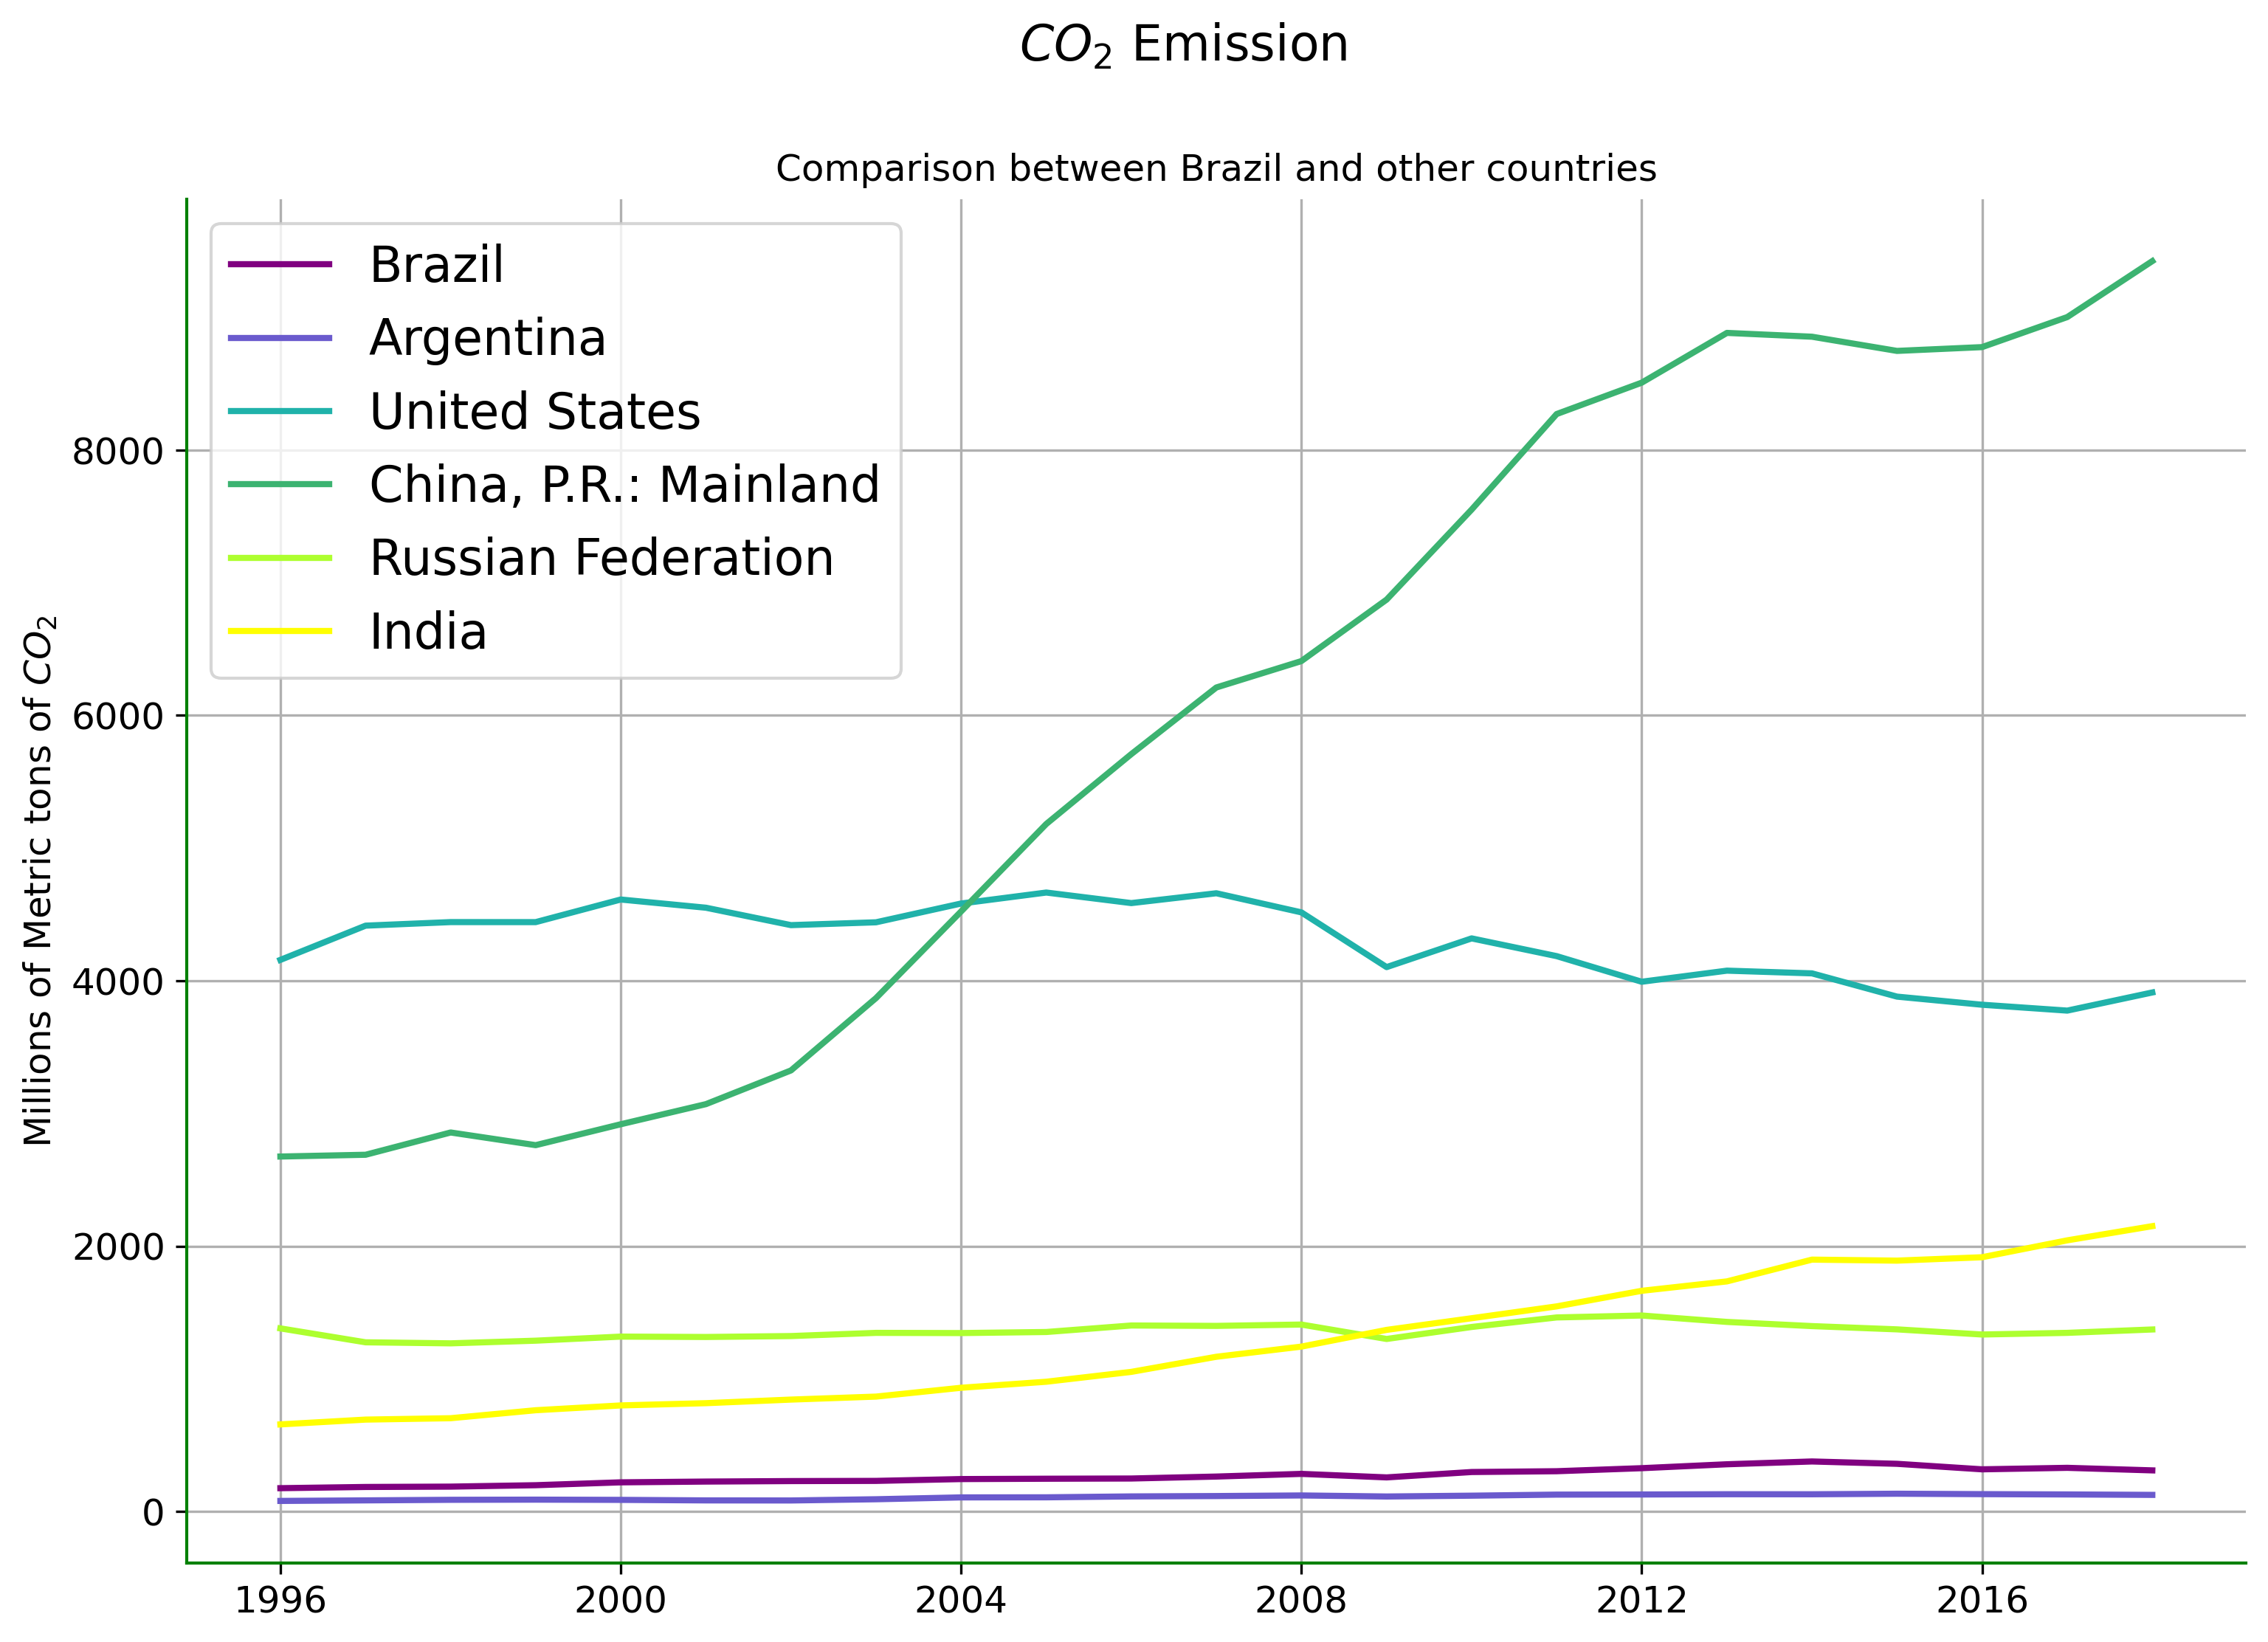

In [58]:
to_plot_carbon = df_gr.loc[
    (df_gr["Unit"] == "Millions of Metric tons of CO2")
]

fig, ax = plt.subplots()
fig.suptitle("$CO_2$ Emission", fontsize=16)

ax.set_title("Comparison between Brazil and other countries")
ax.set_ylabel("Millions of Metric tons of $CO_2$")

for col, country in zip(colors, countries):
    to_plot = to_plot_carbon.query(f"Country == '{country}'").T.iloc[3:, 0]
    x = pd.to_datetime(to_plot.index.str[1:])
    y = to_plot.values
    ax.plot(x, y, "-", label=country, linewidth=2.0, color=col)    
    ax.legend()

#### 3.1.2 $CO_2$ Emission per 1 million USD of output

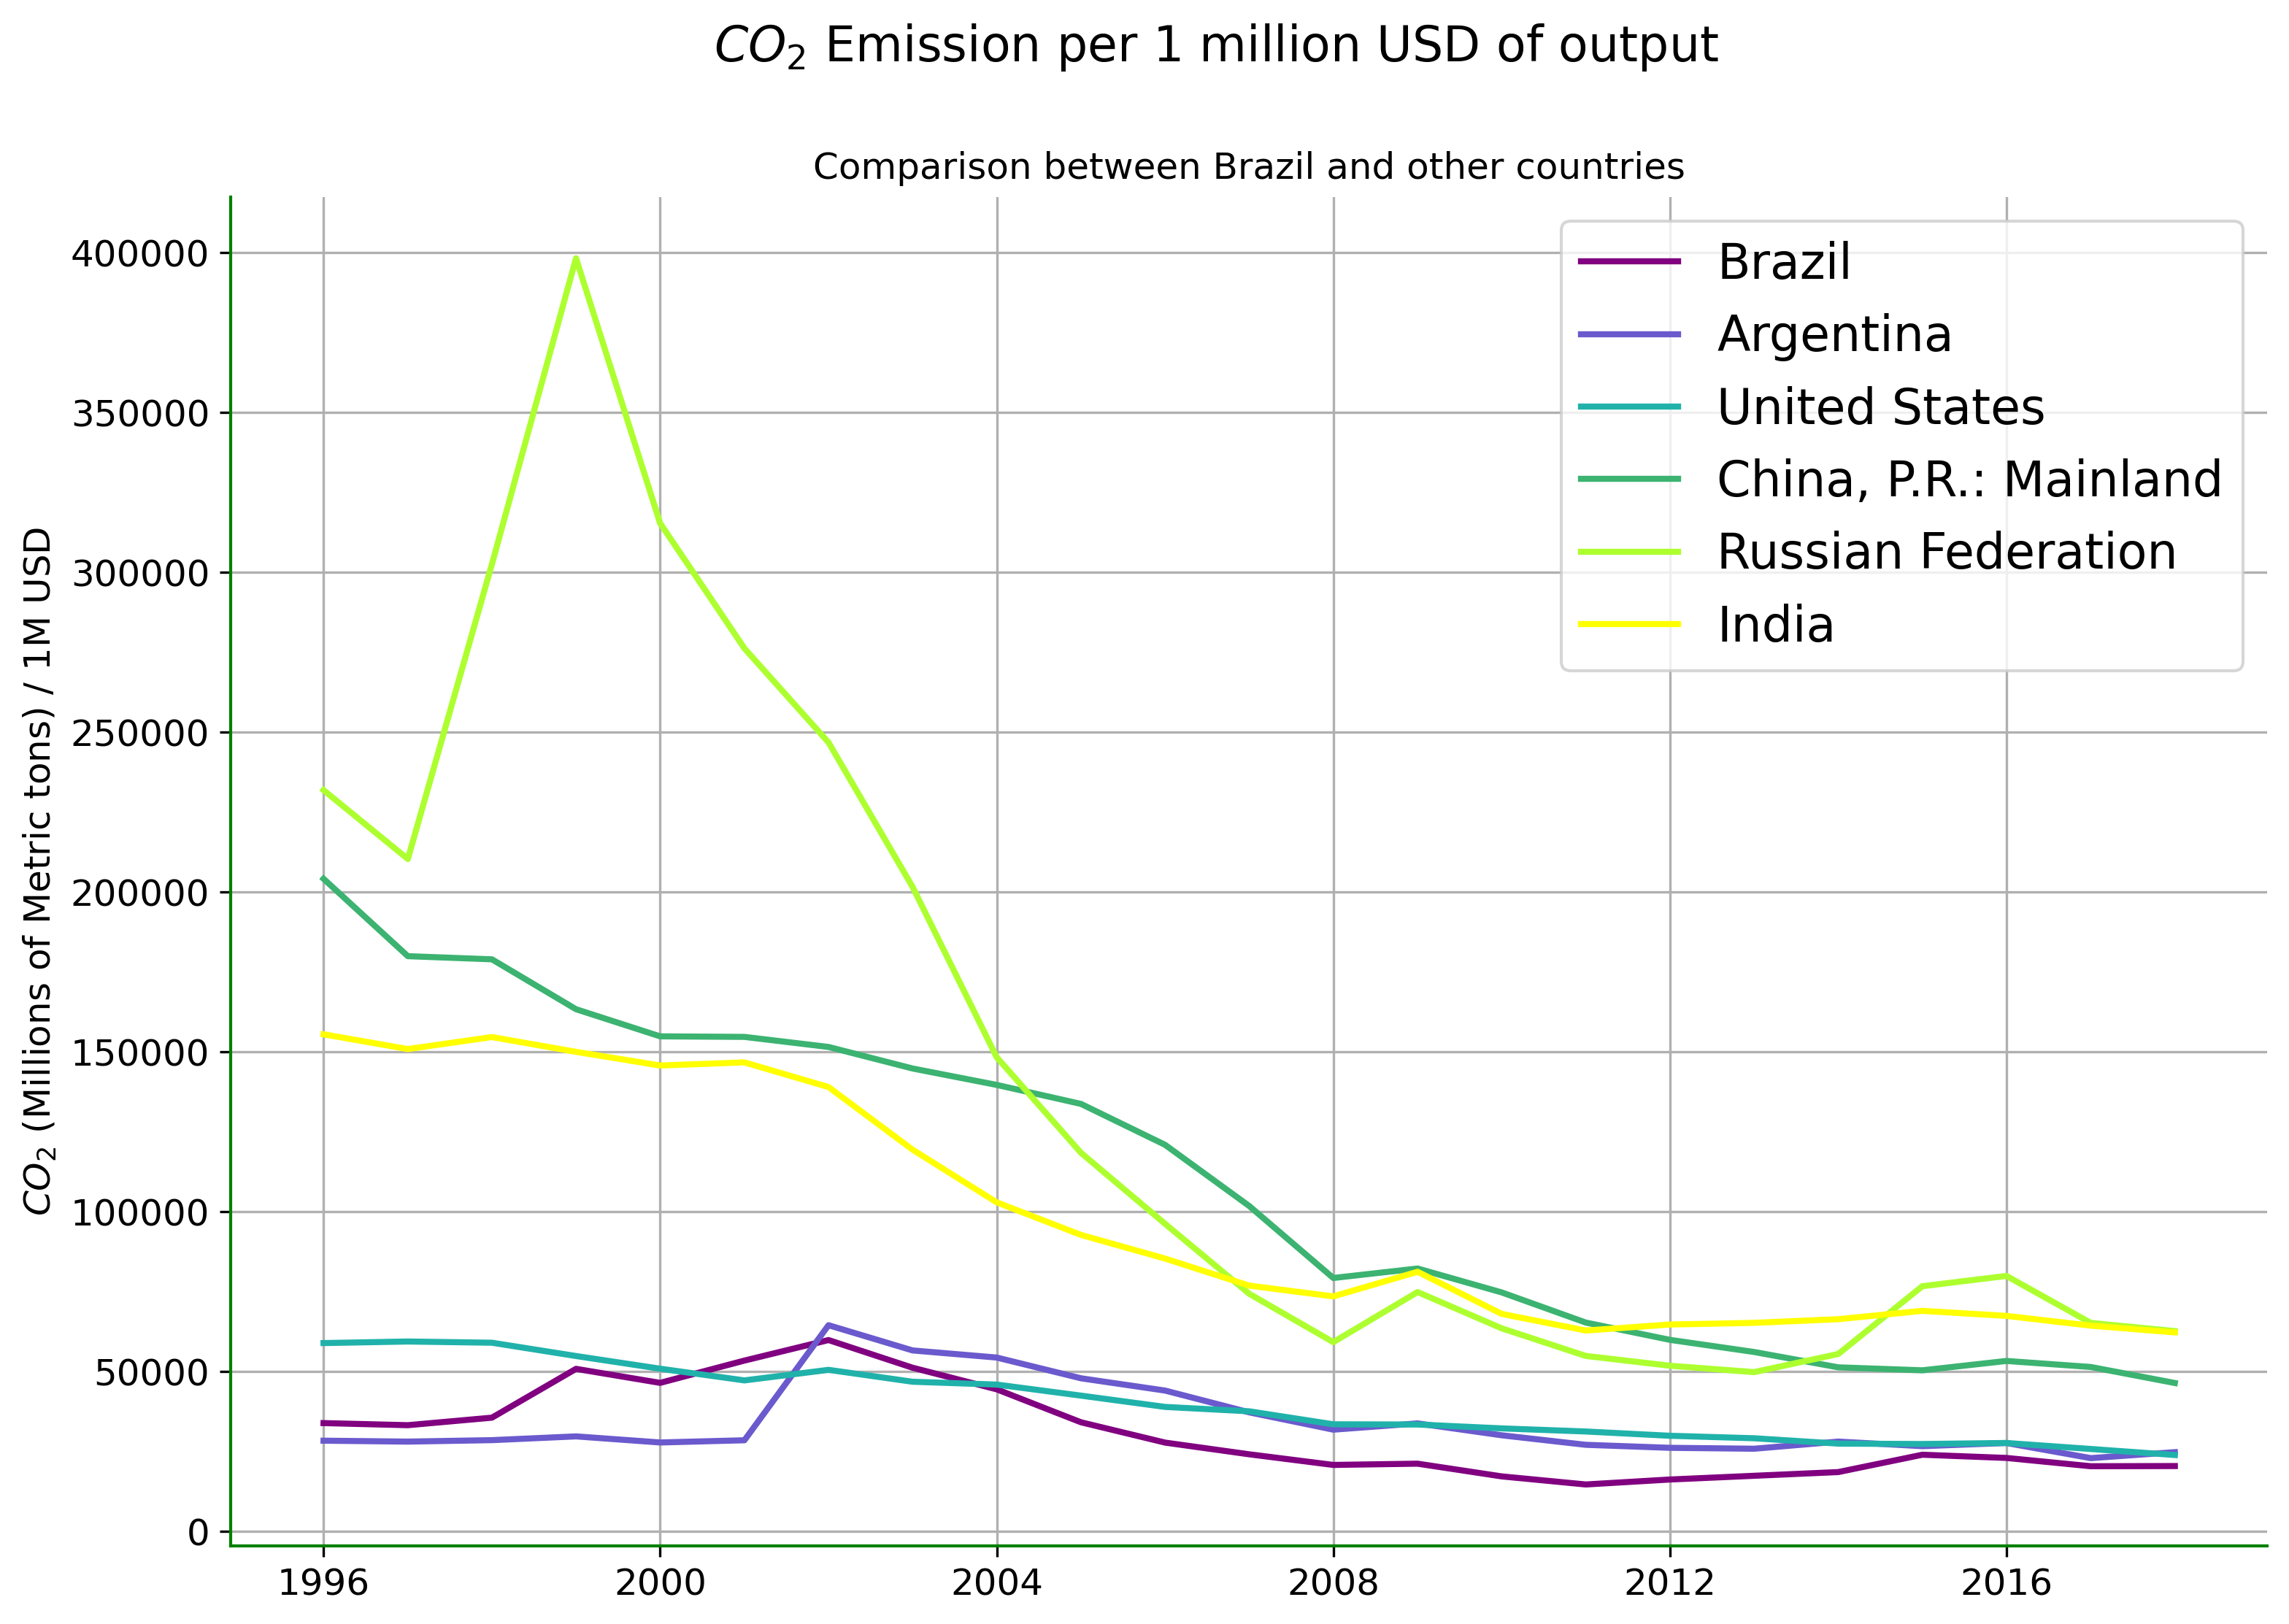

In [59]:
to_plot_carbon = df_gr.loc[
    (df_gr["Unit"] == "Metric Tons of CO2 Emissions per $1million USD of output")
]

fig, ax = plt.subplots()
fig.suptitle("$CO_2$ Emission per 1 million USD of output", fontsize=16)

ax.set_title("Comparison between Brazil and other countries")
ax.set_ylabel("$CO_2$ (Millions of Metric tons) / 1M USD")


for col, country in zip(colors, countries):
    to_plot = to_plot_carbon.query(f"Country == '{country}'").T.iloc[3:, 0]
    x = pd.to_datetime(to_plot.index.str[1:])
    y = to_plot.values
    ax.plot(x, y, "-", label=country, linewidth=2.0, color=col)    
    ax.legend()



#### 3.1.3 Top 5 industries emitting $CO_2$ in Brazil during the years

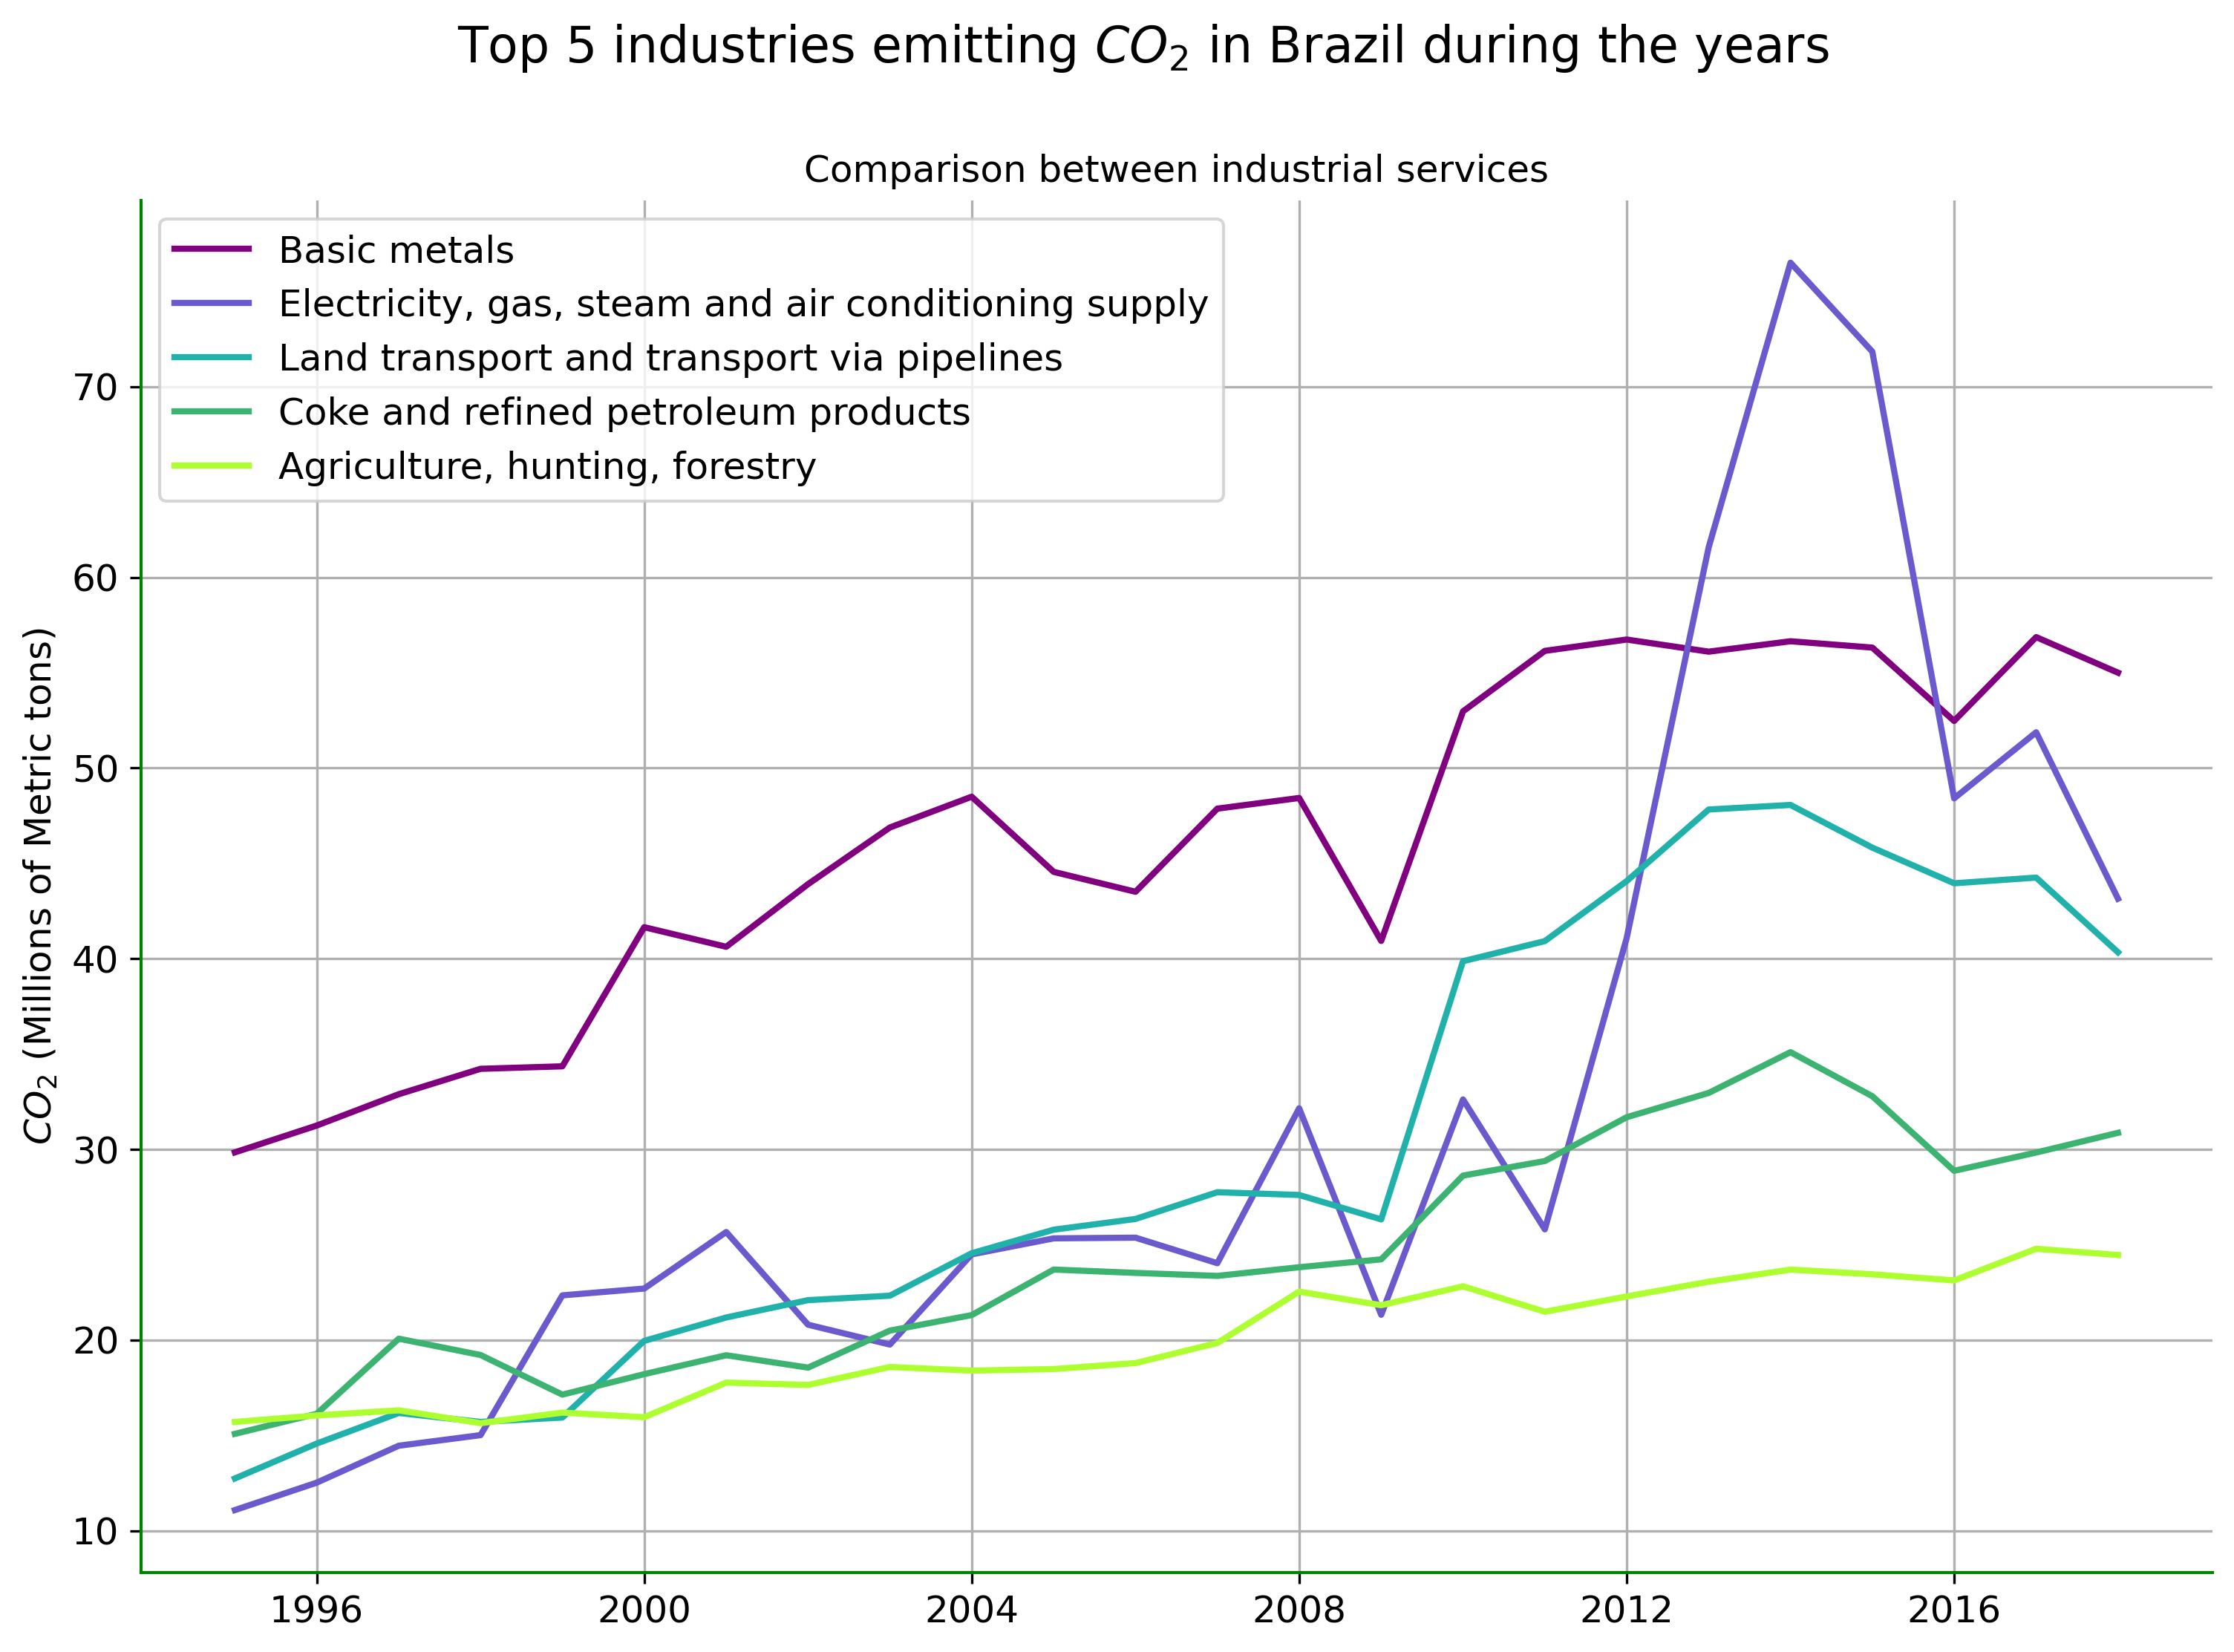

In [60]:
to_plot_carbon = df_gr_ind.loc[
    (df_gr_ind["Unit"] == "Millions of Metric tons of CO2") &\
    (df_gr_ind["Country"] == "Brazil")
]

most_emissions_id = to_plot_carbon.T.iloc[3:, :].sum().sort_values(ascending=False).head().index
ind_list = to_plot_carbon.loc[most_emissions_id, :].Industry.unique()


fig, ax = plt.subplots()
fig.suptitle("Top 5 industries emitting $CO_2$ in Brazil during the years", fontsize=16)

ax.set_title("Comparison between industrial services")
ax.set_ylabel("$CO_2$ (Millions of Metric tons)")

for col, ind in zip(colors, ind_list):
    to_plot = to_plot_carbon.query(f"Industry == '{ind}'").T.iloc[3:, 0]
    x = pd.to_datetime(to_plot.index.str[1:])
    y = to_plot.values
    ax.plot(x, y, "-", label=ind, linewidth=2.0, color=col)    
    ax.legend(fontsize=12)

### 3.2 Florestas e $CO_2$

#### 3.2.1 Carbon stocks in forests

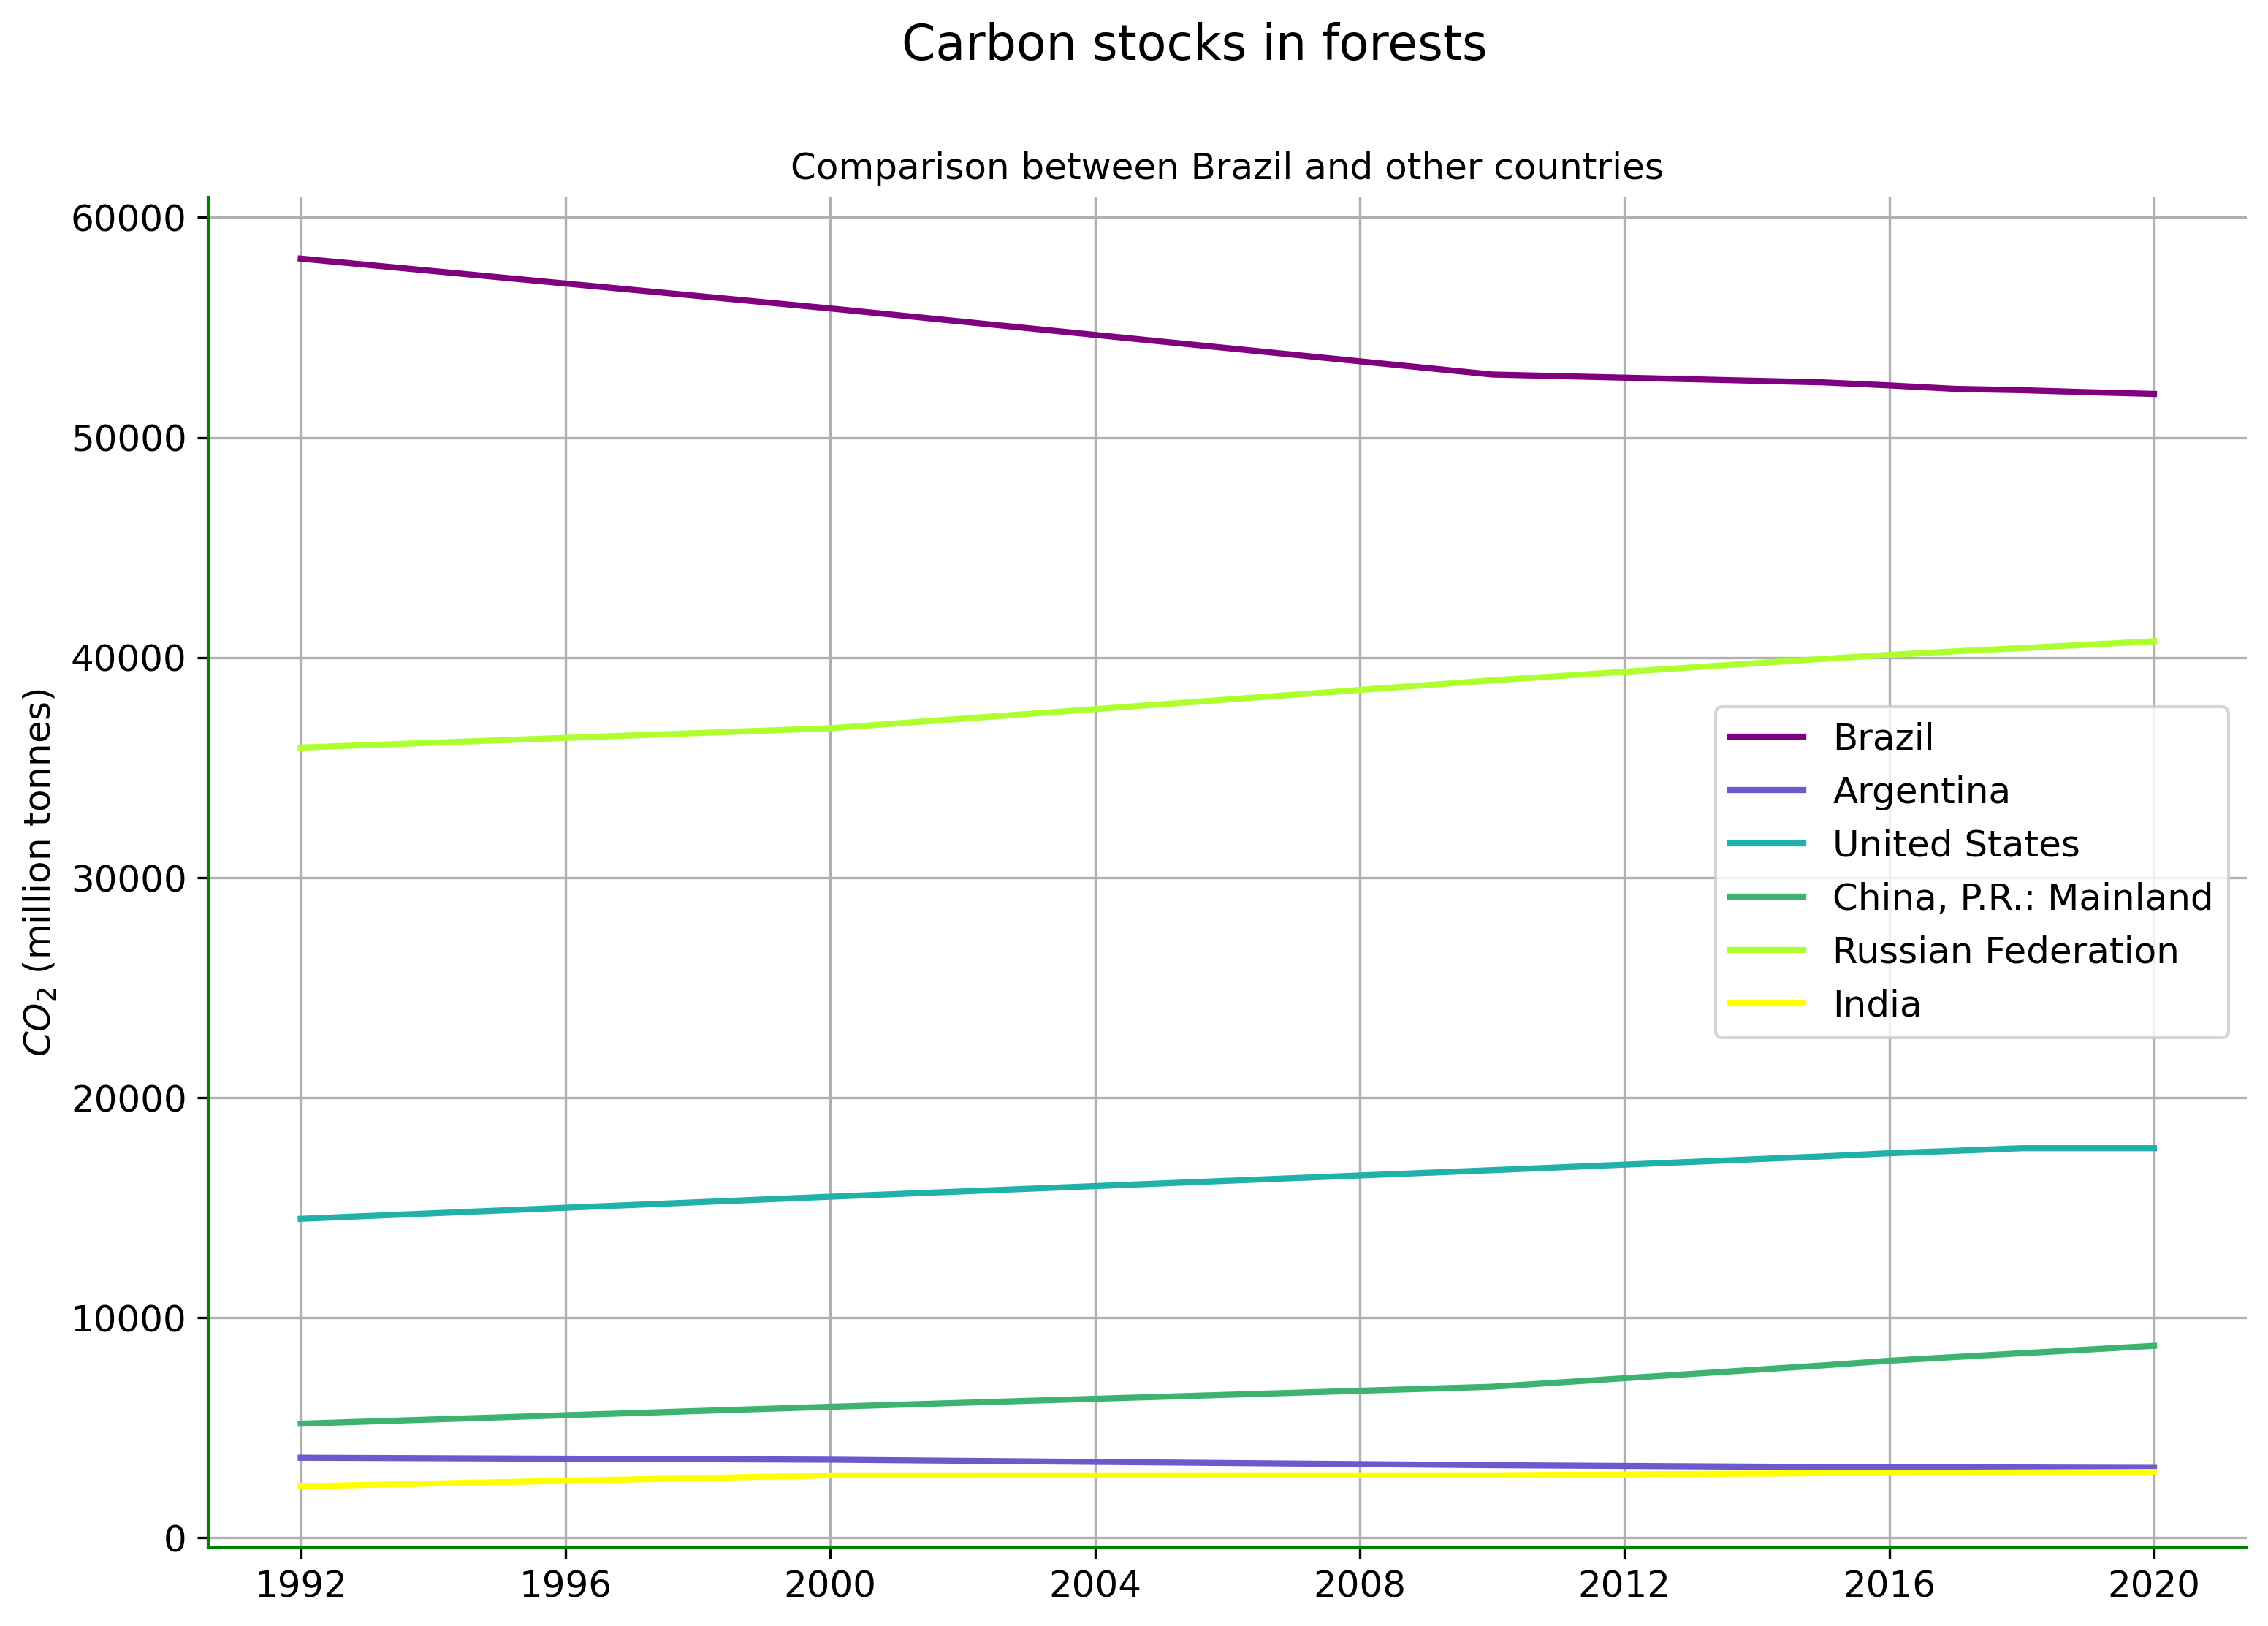

In [61]:
metric = "Carbon stocks in forests"
metric_unit = "$CO_2$ (million tonnes)"

to_plot_carbon = df2_rel.loc[
    (df2_rel["Indicator"] == metric)
]

fig, ax = plt.subplots()
fig.suptitle(metric, fontsize=16)

ax.set_title("Comparison between Brazil and other countries")
ax.set_ylabel(metric_unit)

for col, country in zip(colors, countries):
    to_plot = to_plot_carbon.query(f"Country == '{country}'").T.iloc[3:, 0]
    x = pd.to_datetime(to_plot.index.str[1:])
    y = to_plot.values
    ax.plot(x, y, "-", label=country, linewidth=2.0, color=col)    
    ax.legend(fontsize=12)


#### 3.2.2 Percentage of Forest Area

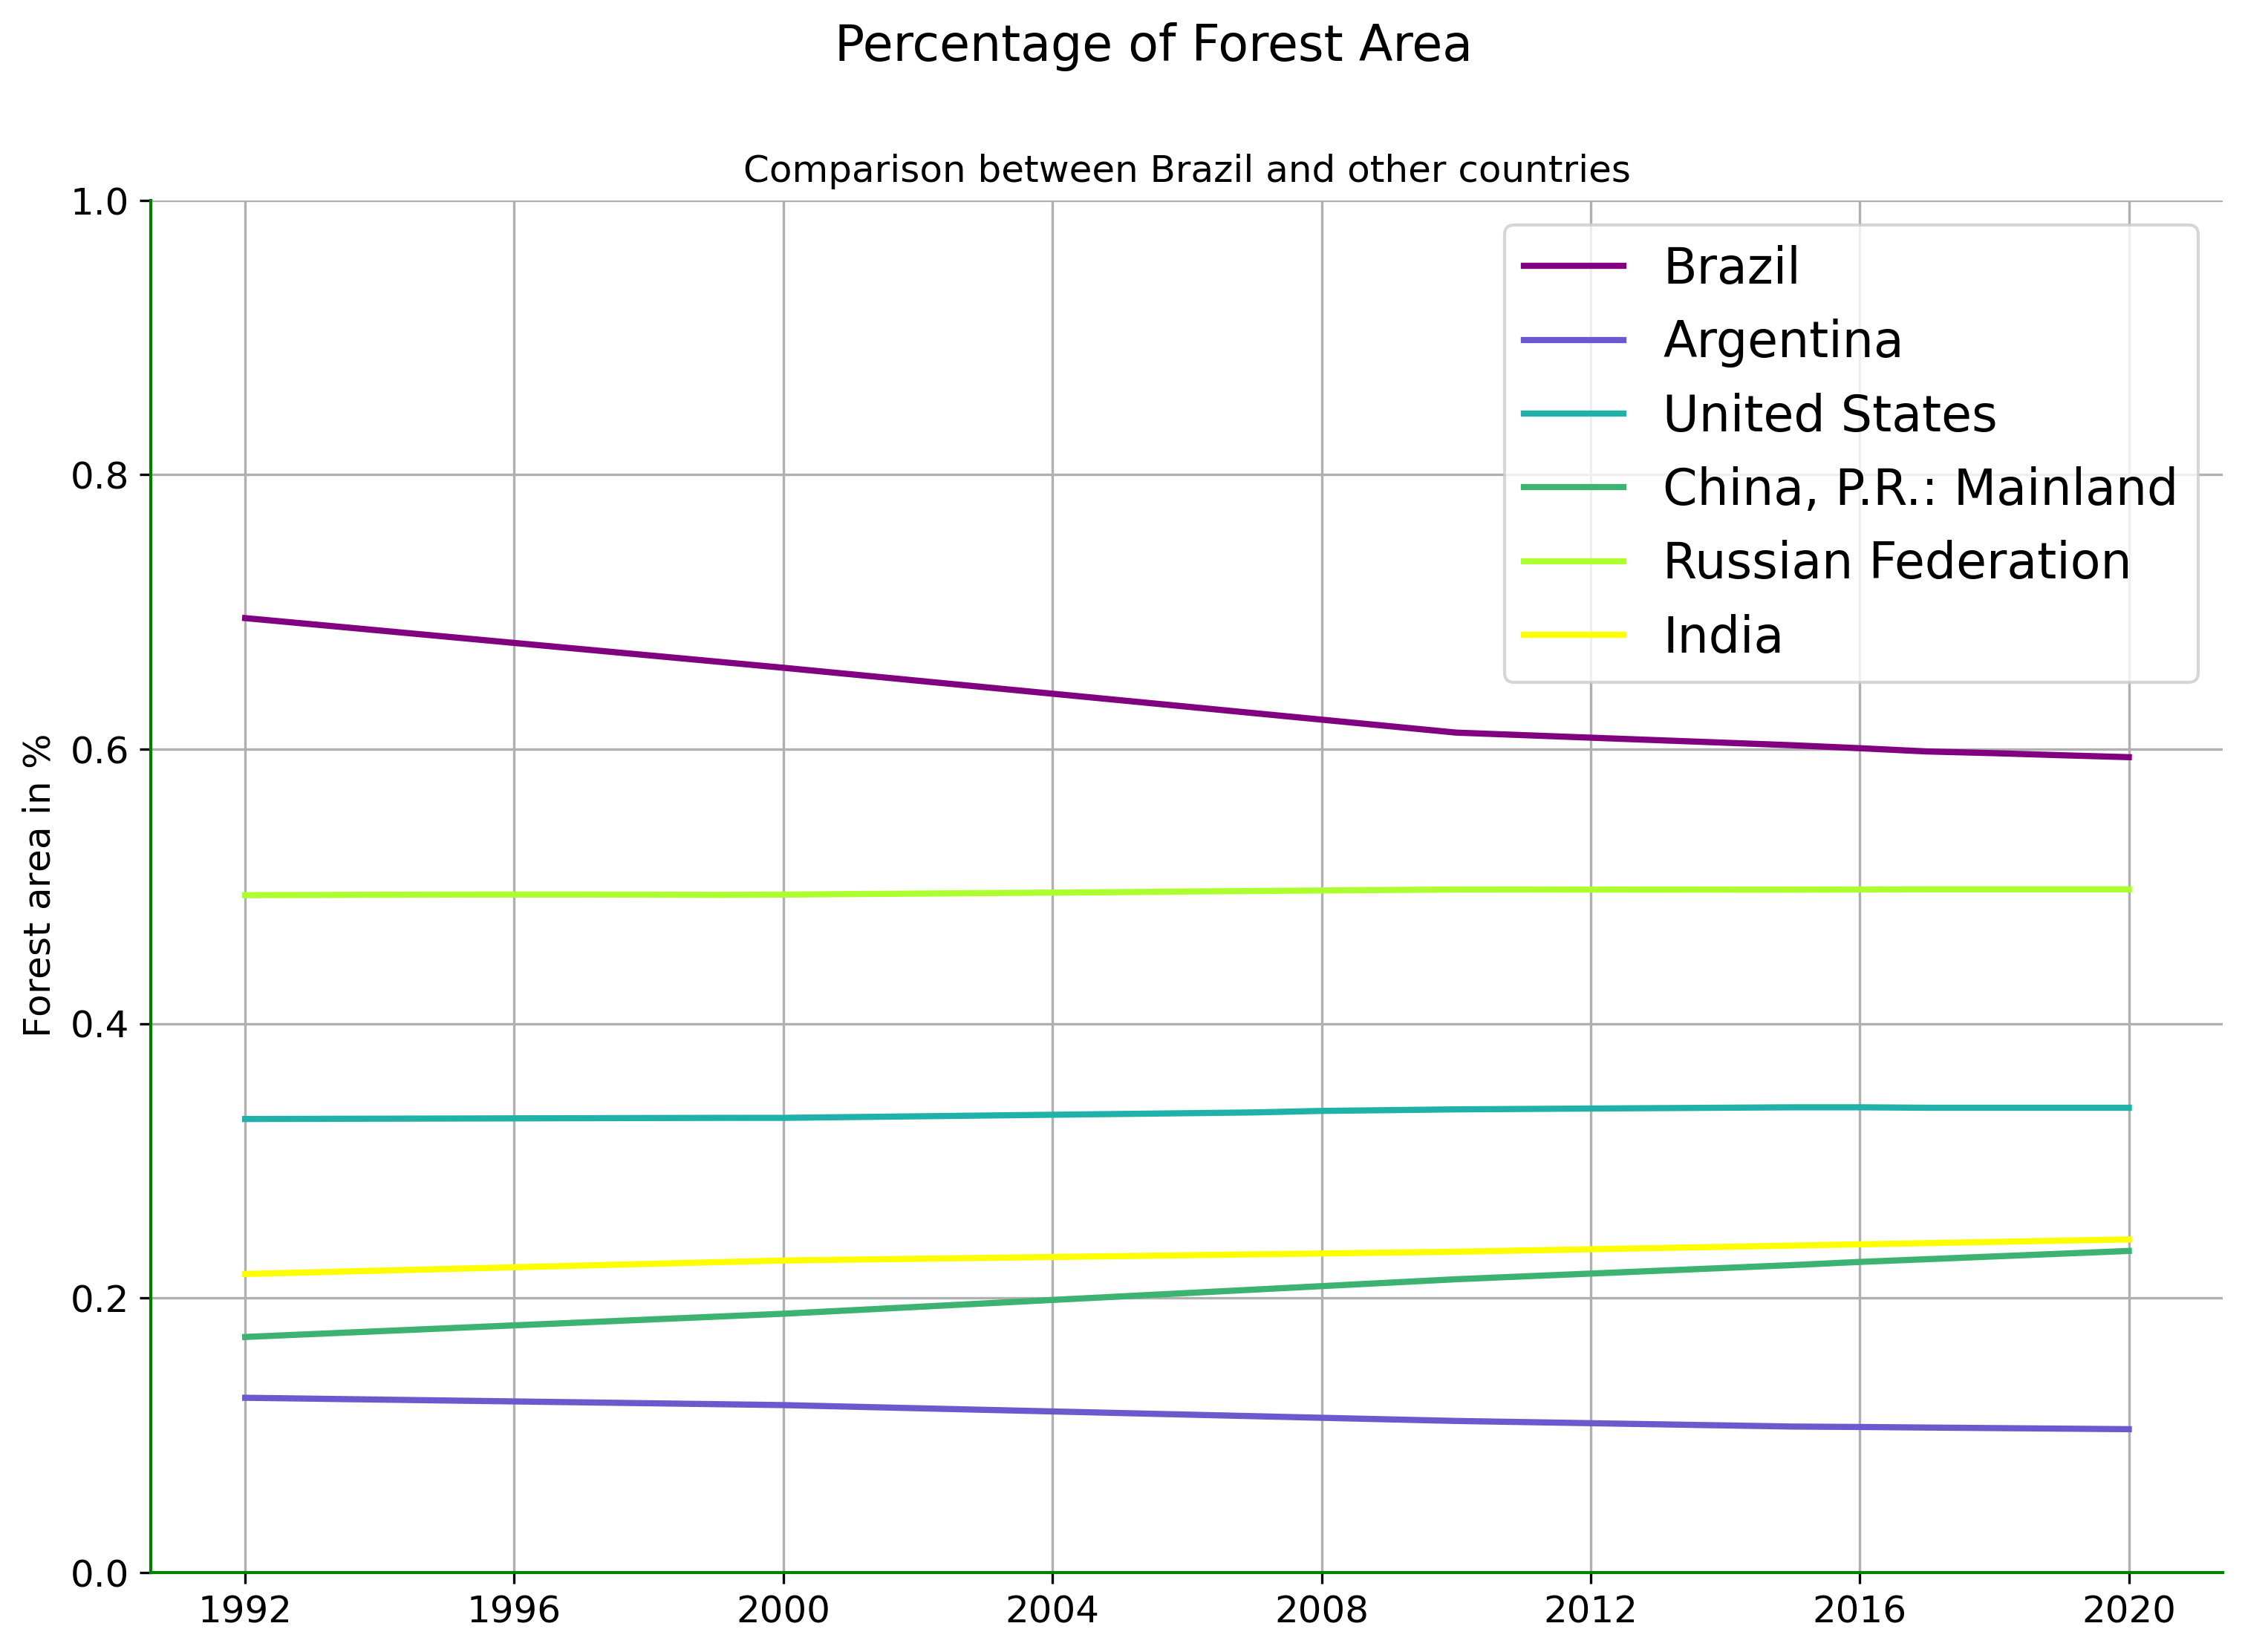

In [62]:

metric = "Forest area"
metric2 = "Land area"
metric_unit = "Forest area in $\%$"

to_plot_carbon = df2_rel.loc[
    (df2_rel["Indicator"] == metric) | (df2_rel["Indicator"] == metric2)
]

fig, ax = plt.subplots()
fig.suptitle("Percentage of Forest Area", fontsize=16)

ax.set_title("Comparison between Brazil and other countries")
ax.set_ylabel(metric_unit)
ax.set_ylim(0, 1)

for col, country in zip(colors, countries):
    to_plot = to_plot_carbon.query(f"Country == '{country}'").T.iloc[3:, :]    
    to_plot.rename(columns = dict(zip(to_plot.columns, [metric, metric2])), inplace=True)
    x = pd.to_datetime(to_plot.index.str[1:])
    y = to_plot.values
    
    perc_forest_area = y[:, 0] / y[:, 1]
    ax.plot(x, perc_forest_area, "-", label=country, linewidth=2.0, color=col)    
    ax.legend()
    


#### 3.2.3 Percentage of Carbon Tonnes per Area

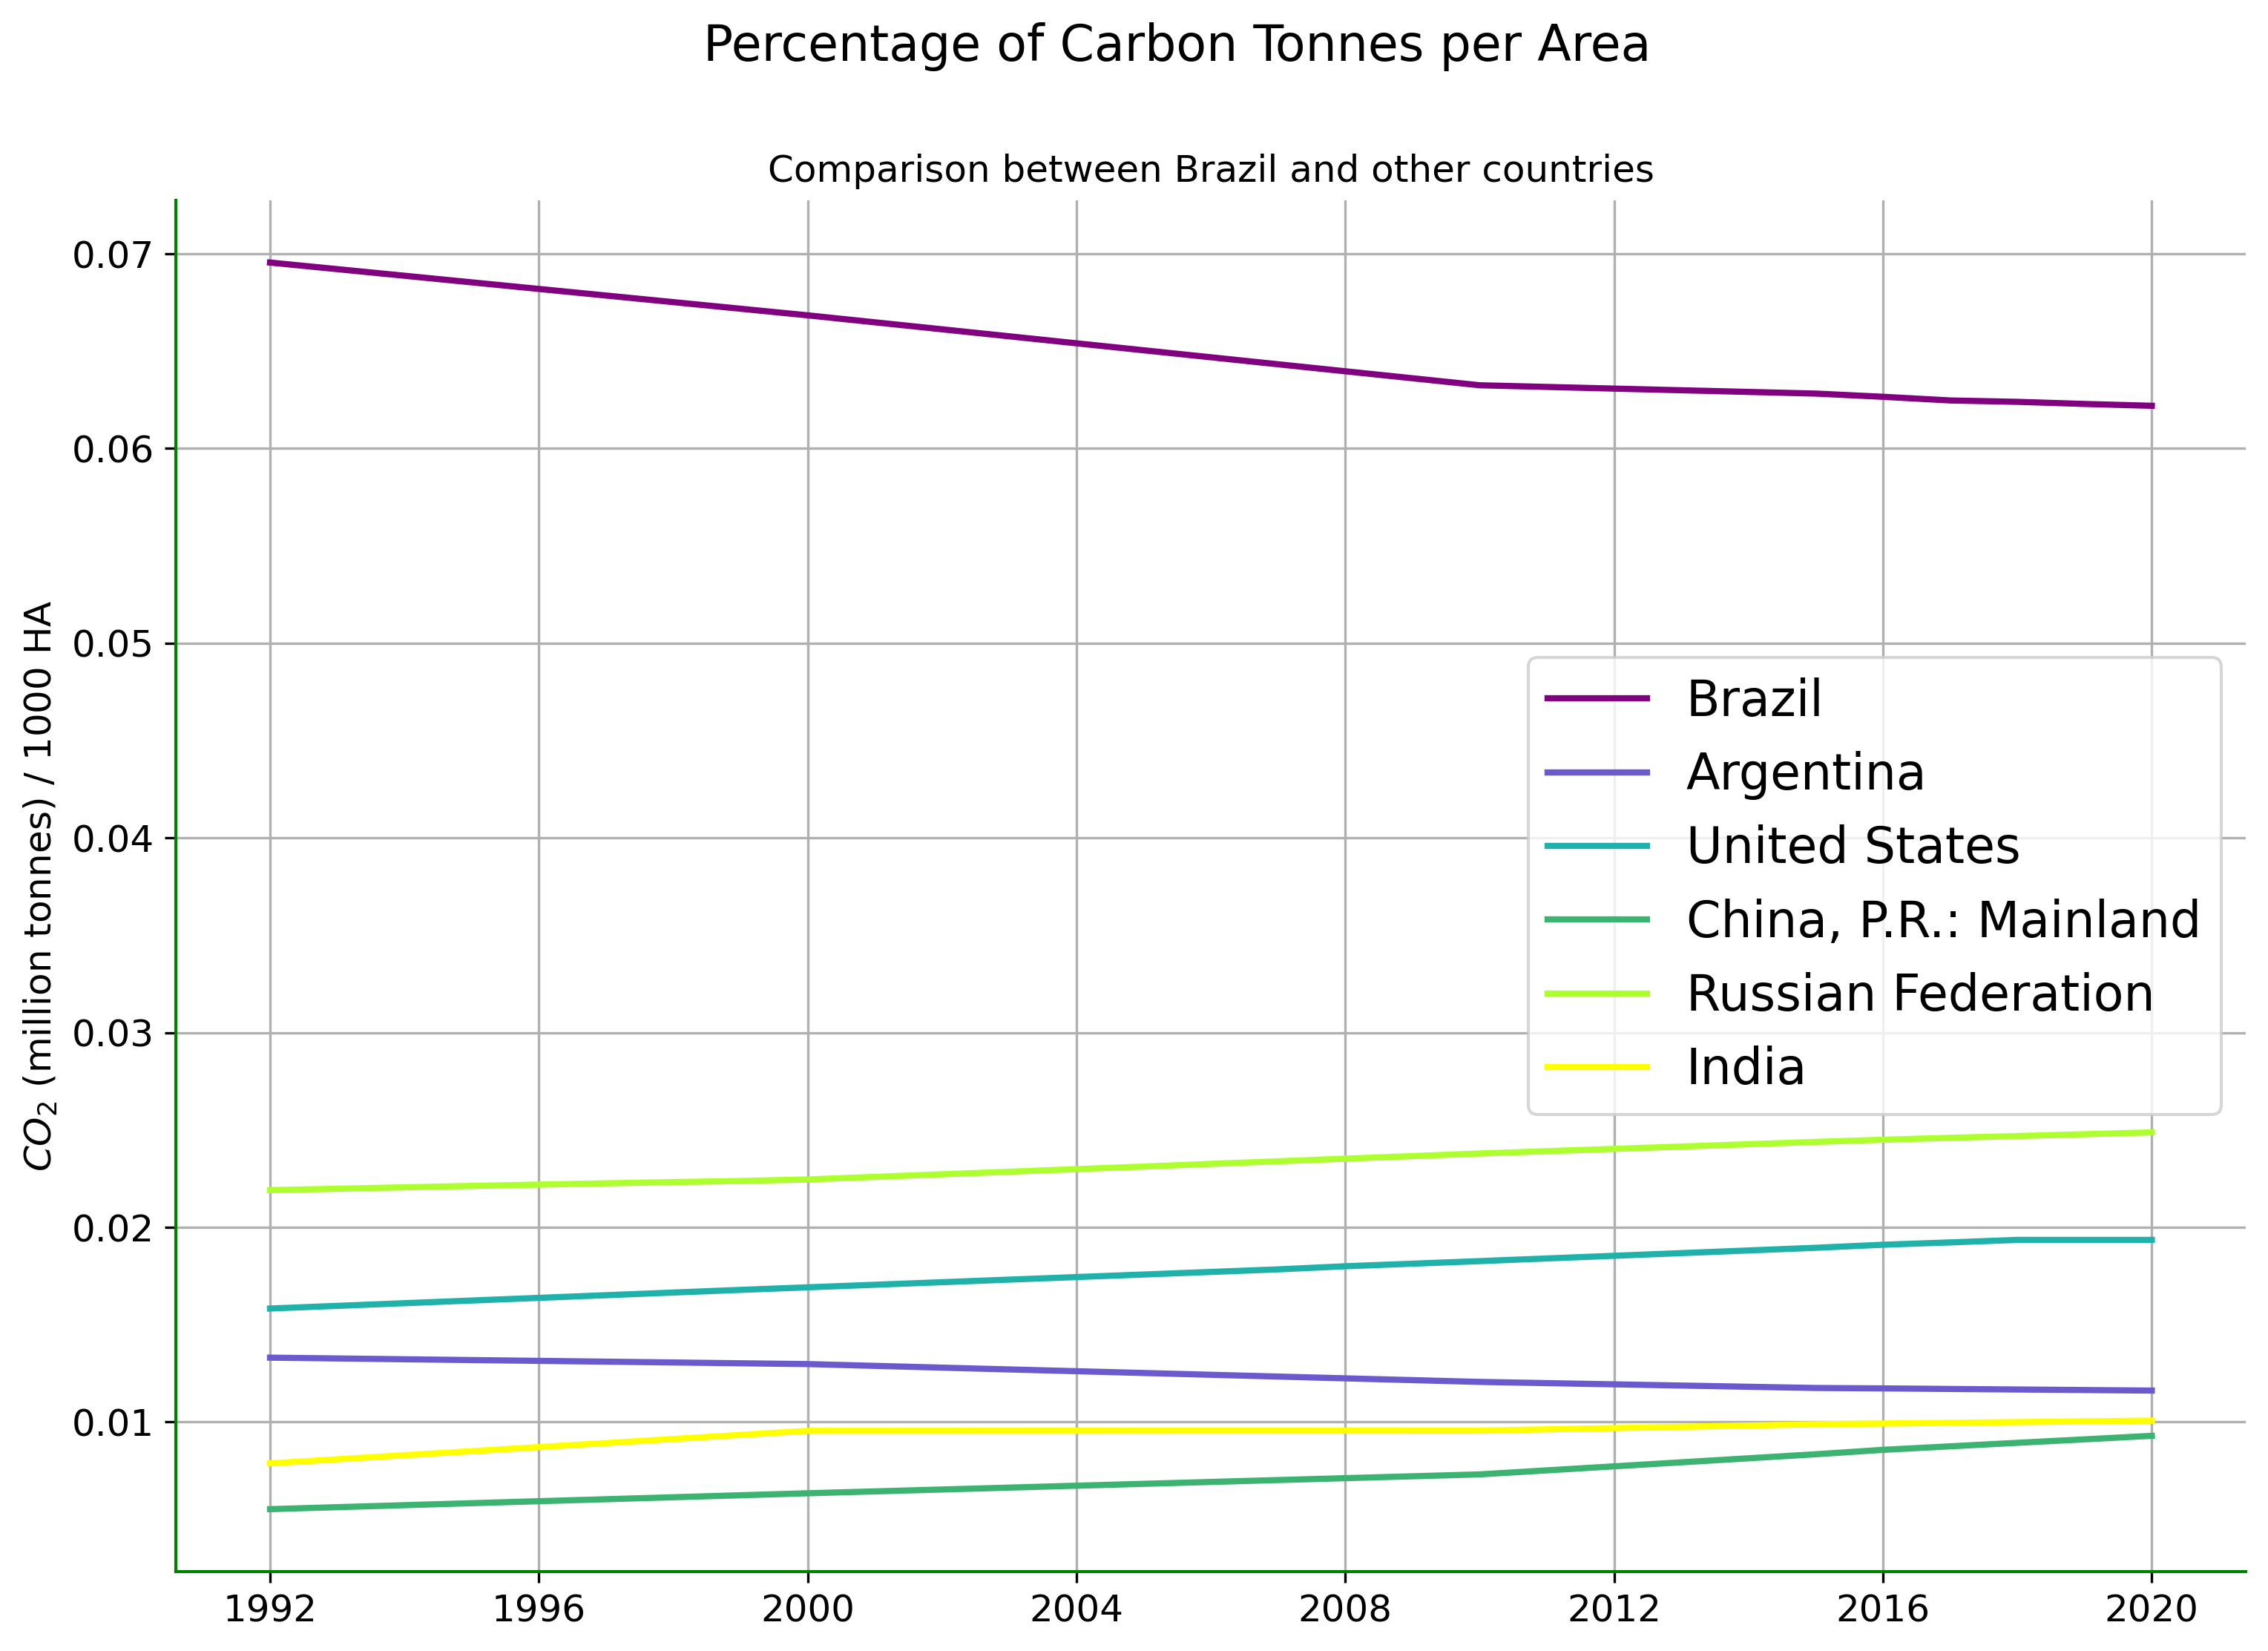

In [63]:
metric = "Carbon stocks in forests"
metric2 = "Land area"
metric_unit = "$CO_2$ (million tonnes) / $1000$ HA"


to_plot_carbon = df2_rel.loc[
    (df2_rel["Indicator"] == metric) | (df2_rel["Indicator"] == metric2)
]

fig, ax = plt.subplots()
fig.suptitle("Percentage of Carbon Tonnes per Area", fontsize=16)

ax.set_title("Comparison between Brazil and other countries")
ax.set_ylabel(metric_unit)

for col, country in zip(colors, countries):
    to_plot = to_plot_carbon.query(f"Country == '{country}'").T.iloc[3:, :]    
    to_plot.rename(columns = dict(zip(to_plot.columns, [metric, metric2])), inplace=True)
    x = pd.to_datetime(to_plot.index.str[1:])
    y = to_plot.values
    
    perc_forest_area = y[:, 0] / y[:, 1]
    ax.plot(x, perc_forest_area, "-", label=country, linewidth=2.0, color=col)    
    ax.legend()
    

### 3.3 Creditos de Compensação de Carbono Emitidos por Registro de Carbono

#### 3.3.1 Number of projects by country

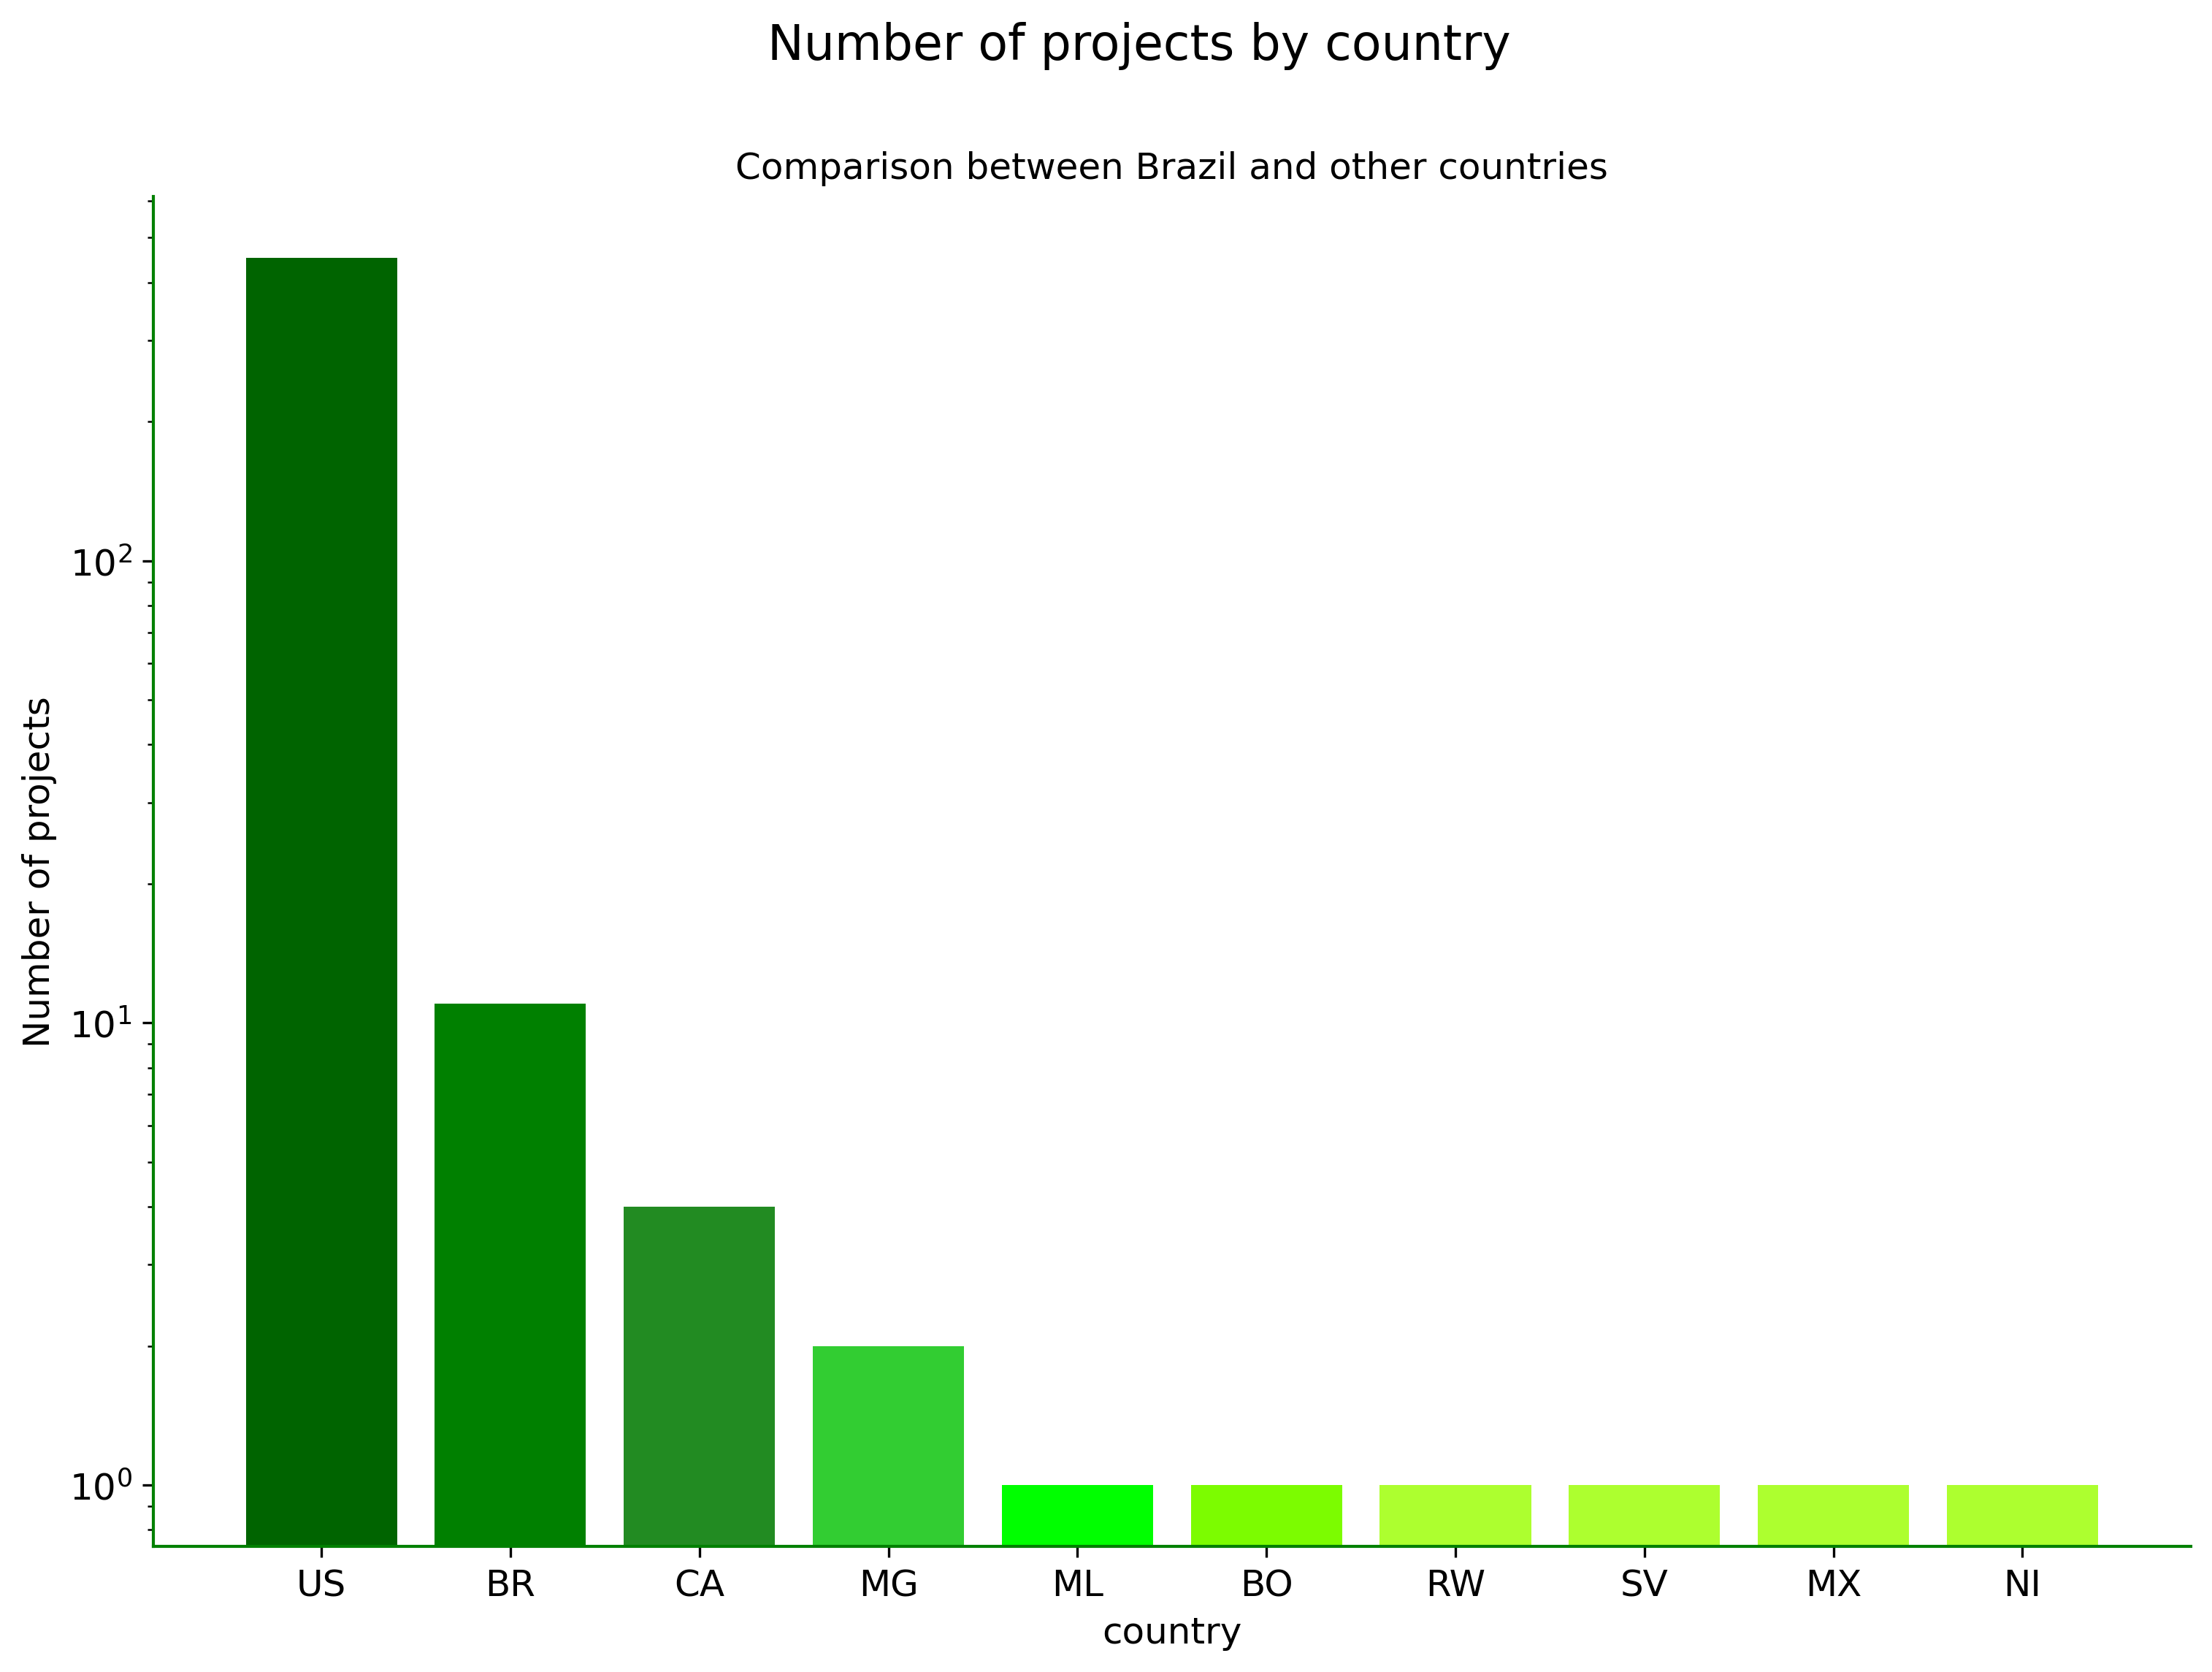

In [64]:
fig, ax = plt.subplots()
fig.suptitle("Number of projects by country", fontsize=16)

ax.set_title("Comparison between Brazil and other countries")
ax.set_ylabel("Number of projects")
ax.set_xlabel("country")
ax.set_yscale('log')
ax.grid(visible=False)

color_list = ['darkgreen','green','forestgreen','limegreen','lime','lawngreen','greenyellow']

for i in range(len(index_project)):
  if i < len(color_list):
    ax.bar(index_project[i],Project_Country_counts[i],color=color_list[i])
  else:
    ax.bar(index_project[i],Project_Country_counts[i],color=color_list[len(color_list)-1])

#### 3.3.2 Number of Projects per Goal

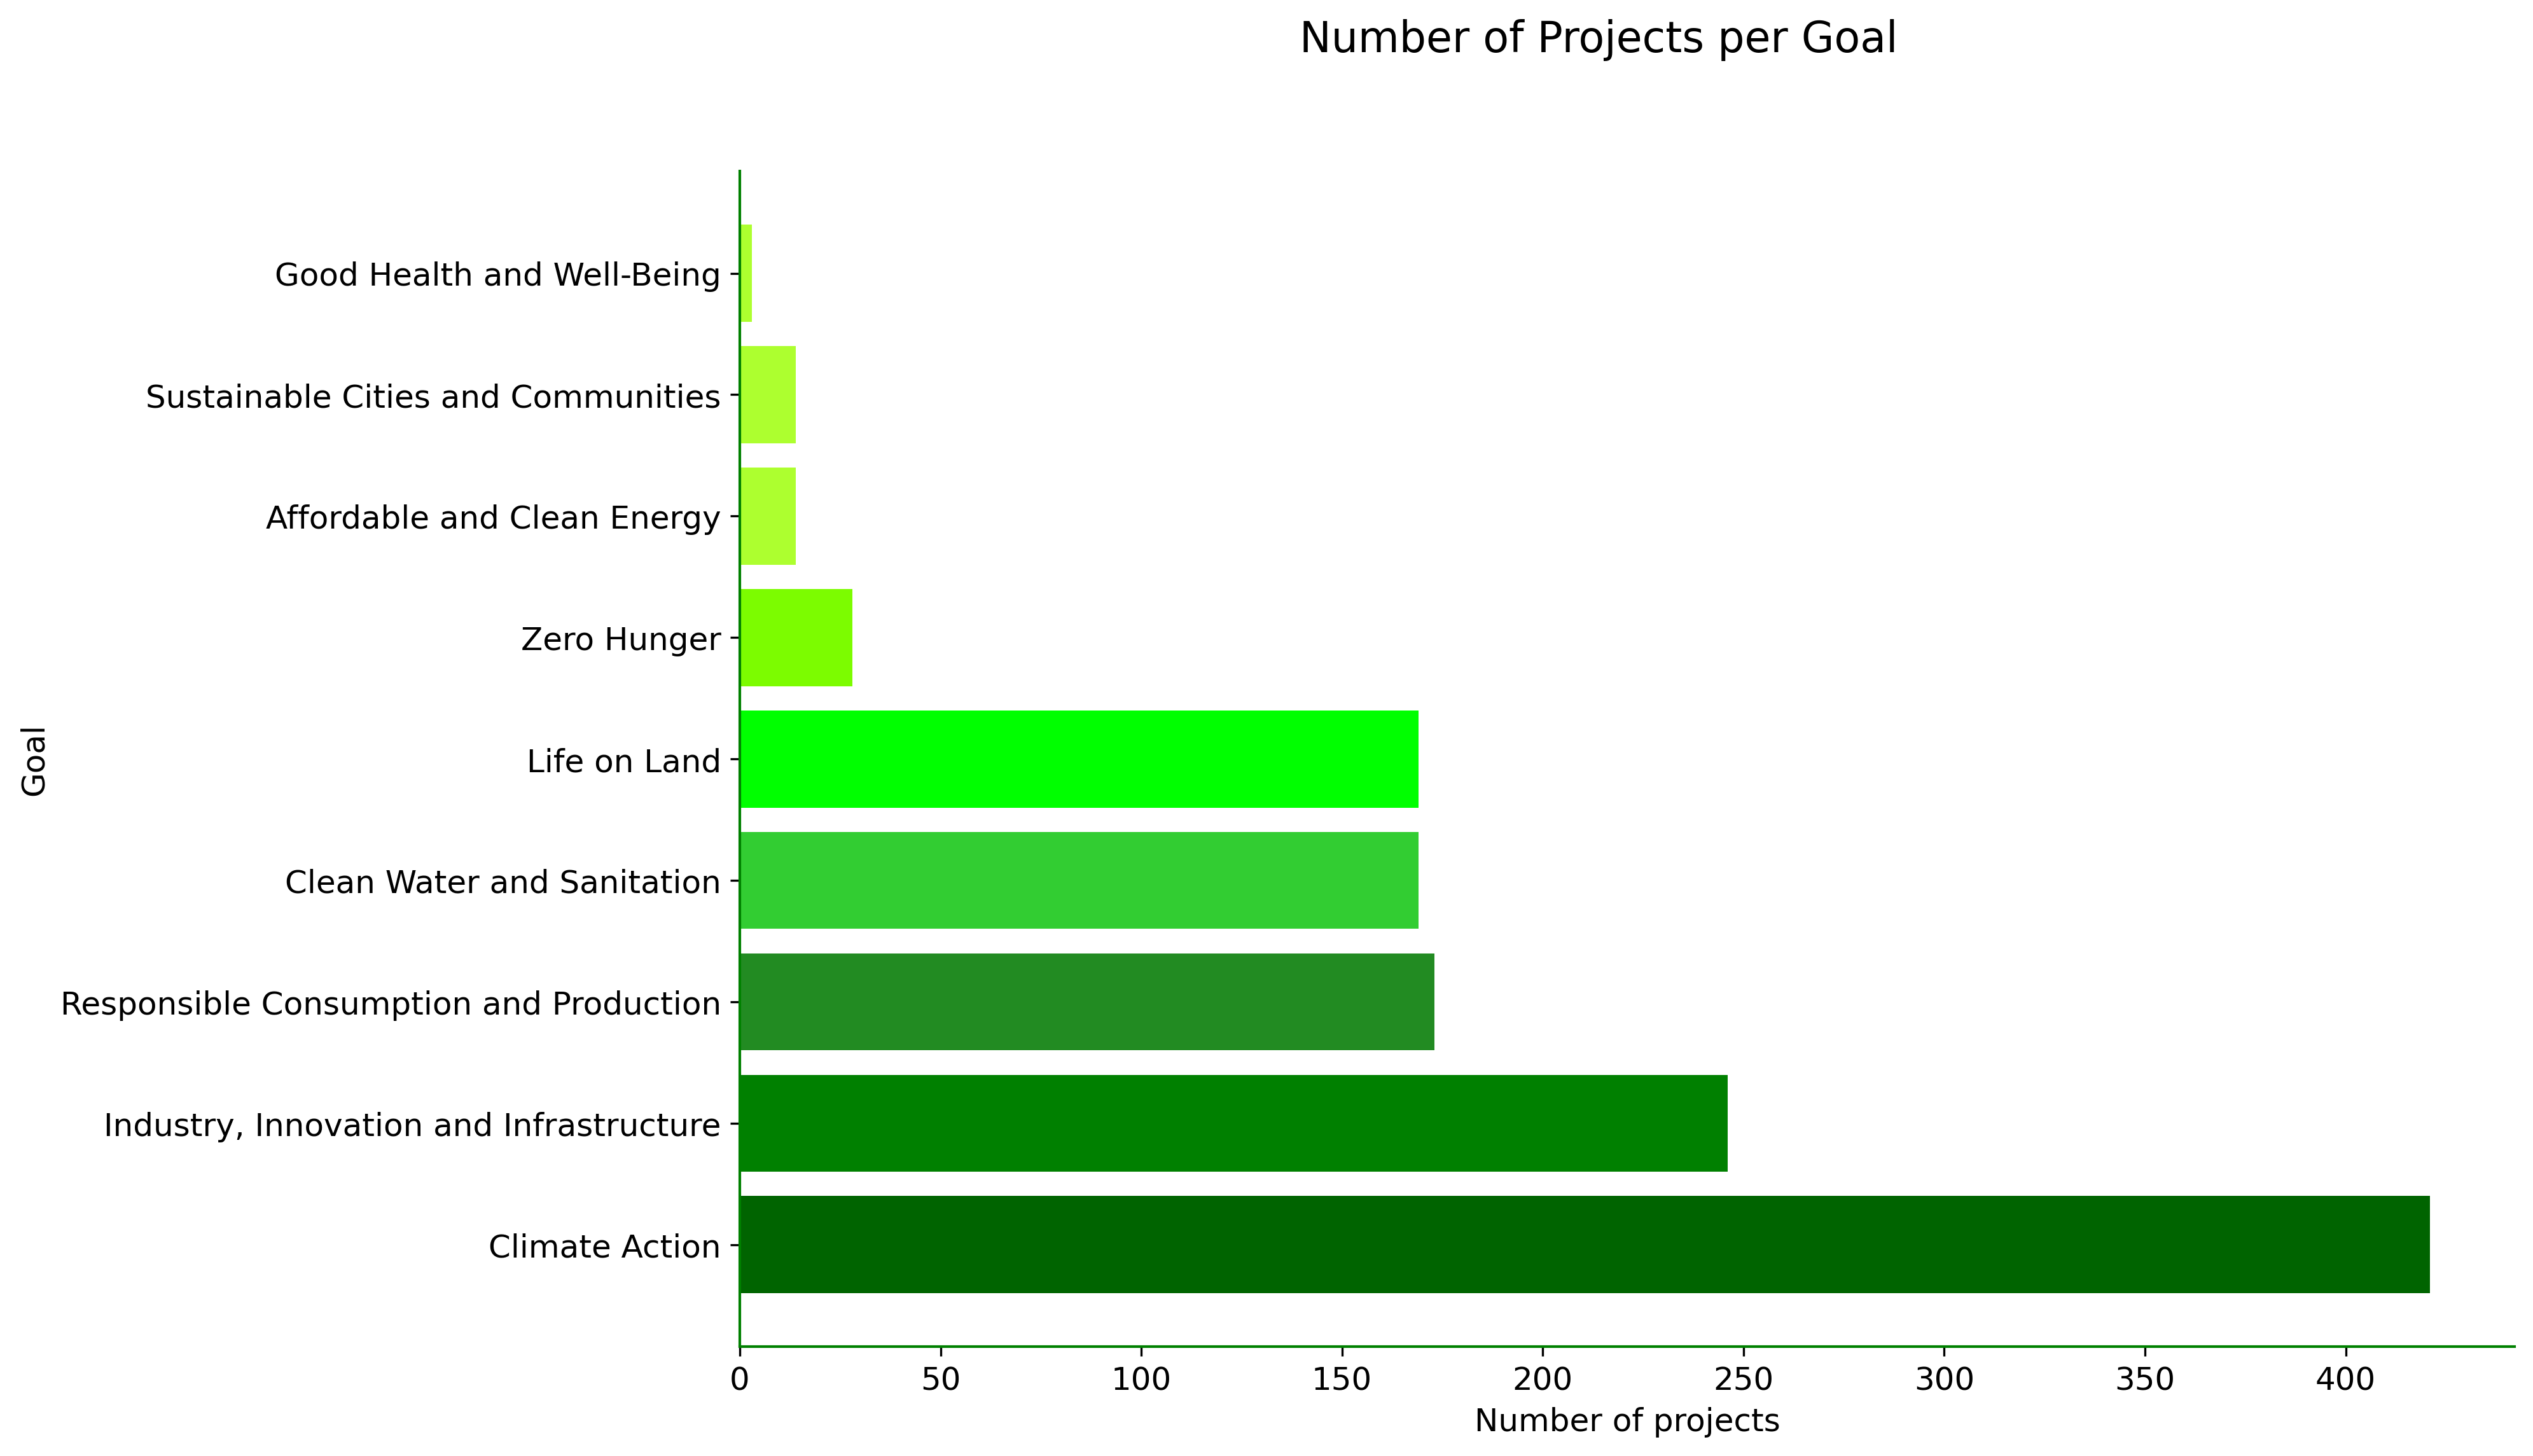

In [65]:
fig, ax = plt.subplots()
fig.suptitle("Number of Projects per Goal", fontsize=16)

ax.set_ylabel("Goal")
ax.set_xlabel("Number of projects")

#ax.set_xticklabels(index_goals,rotation=90)
ax.grid(visible=False)

color_list = ['darkgreen','green','forestgreen','limegreen','lime','lawngreen','greenyellow']

for i in range(len(index_goals)):
  if i < len(color_list):
    ax.barh(index_goals[i],goals_count[i],color=color_list[i])
  else:
    ax.barh(index_goals[i],goals_count[i],color=color_list[len(color_list)-1])

#### 3.3.3 Total Number of Credits Registered per type Project

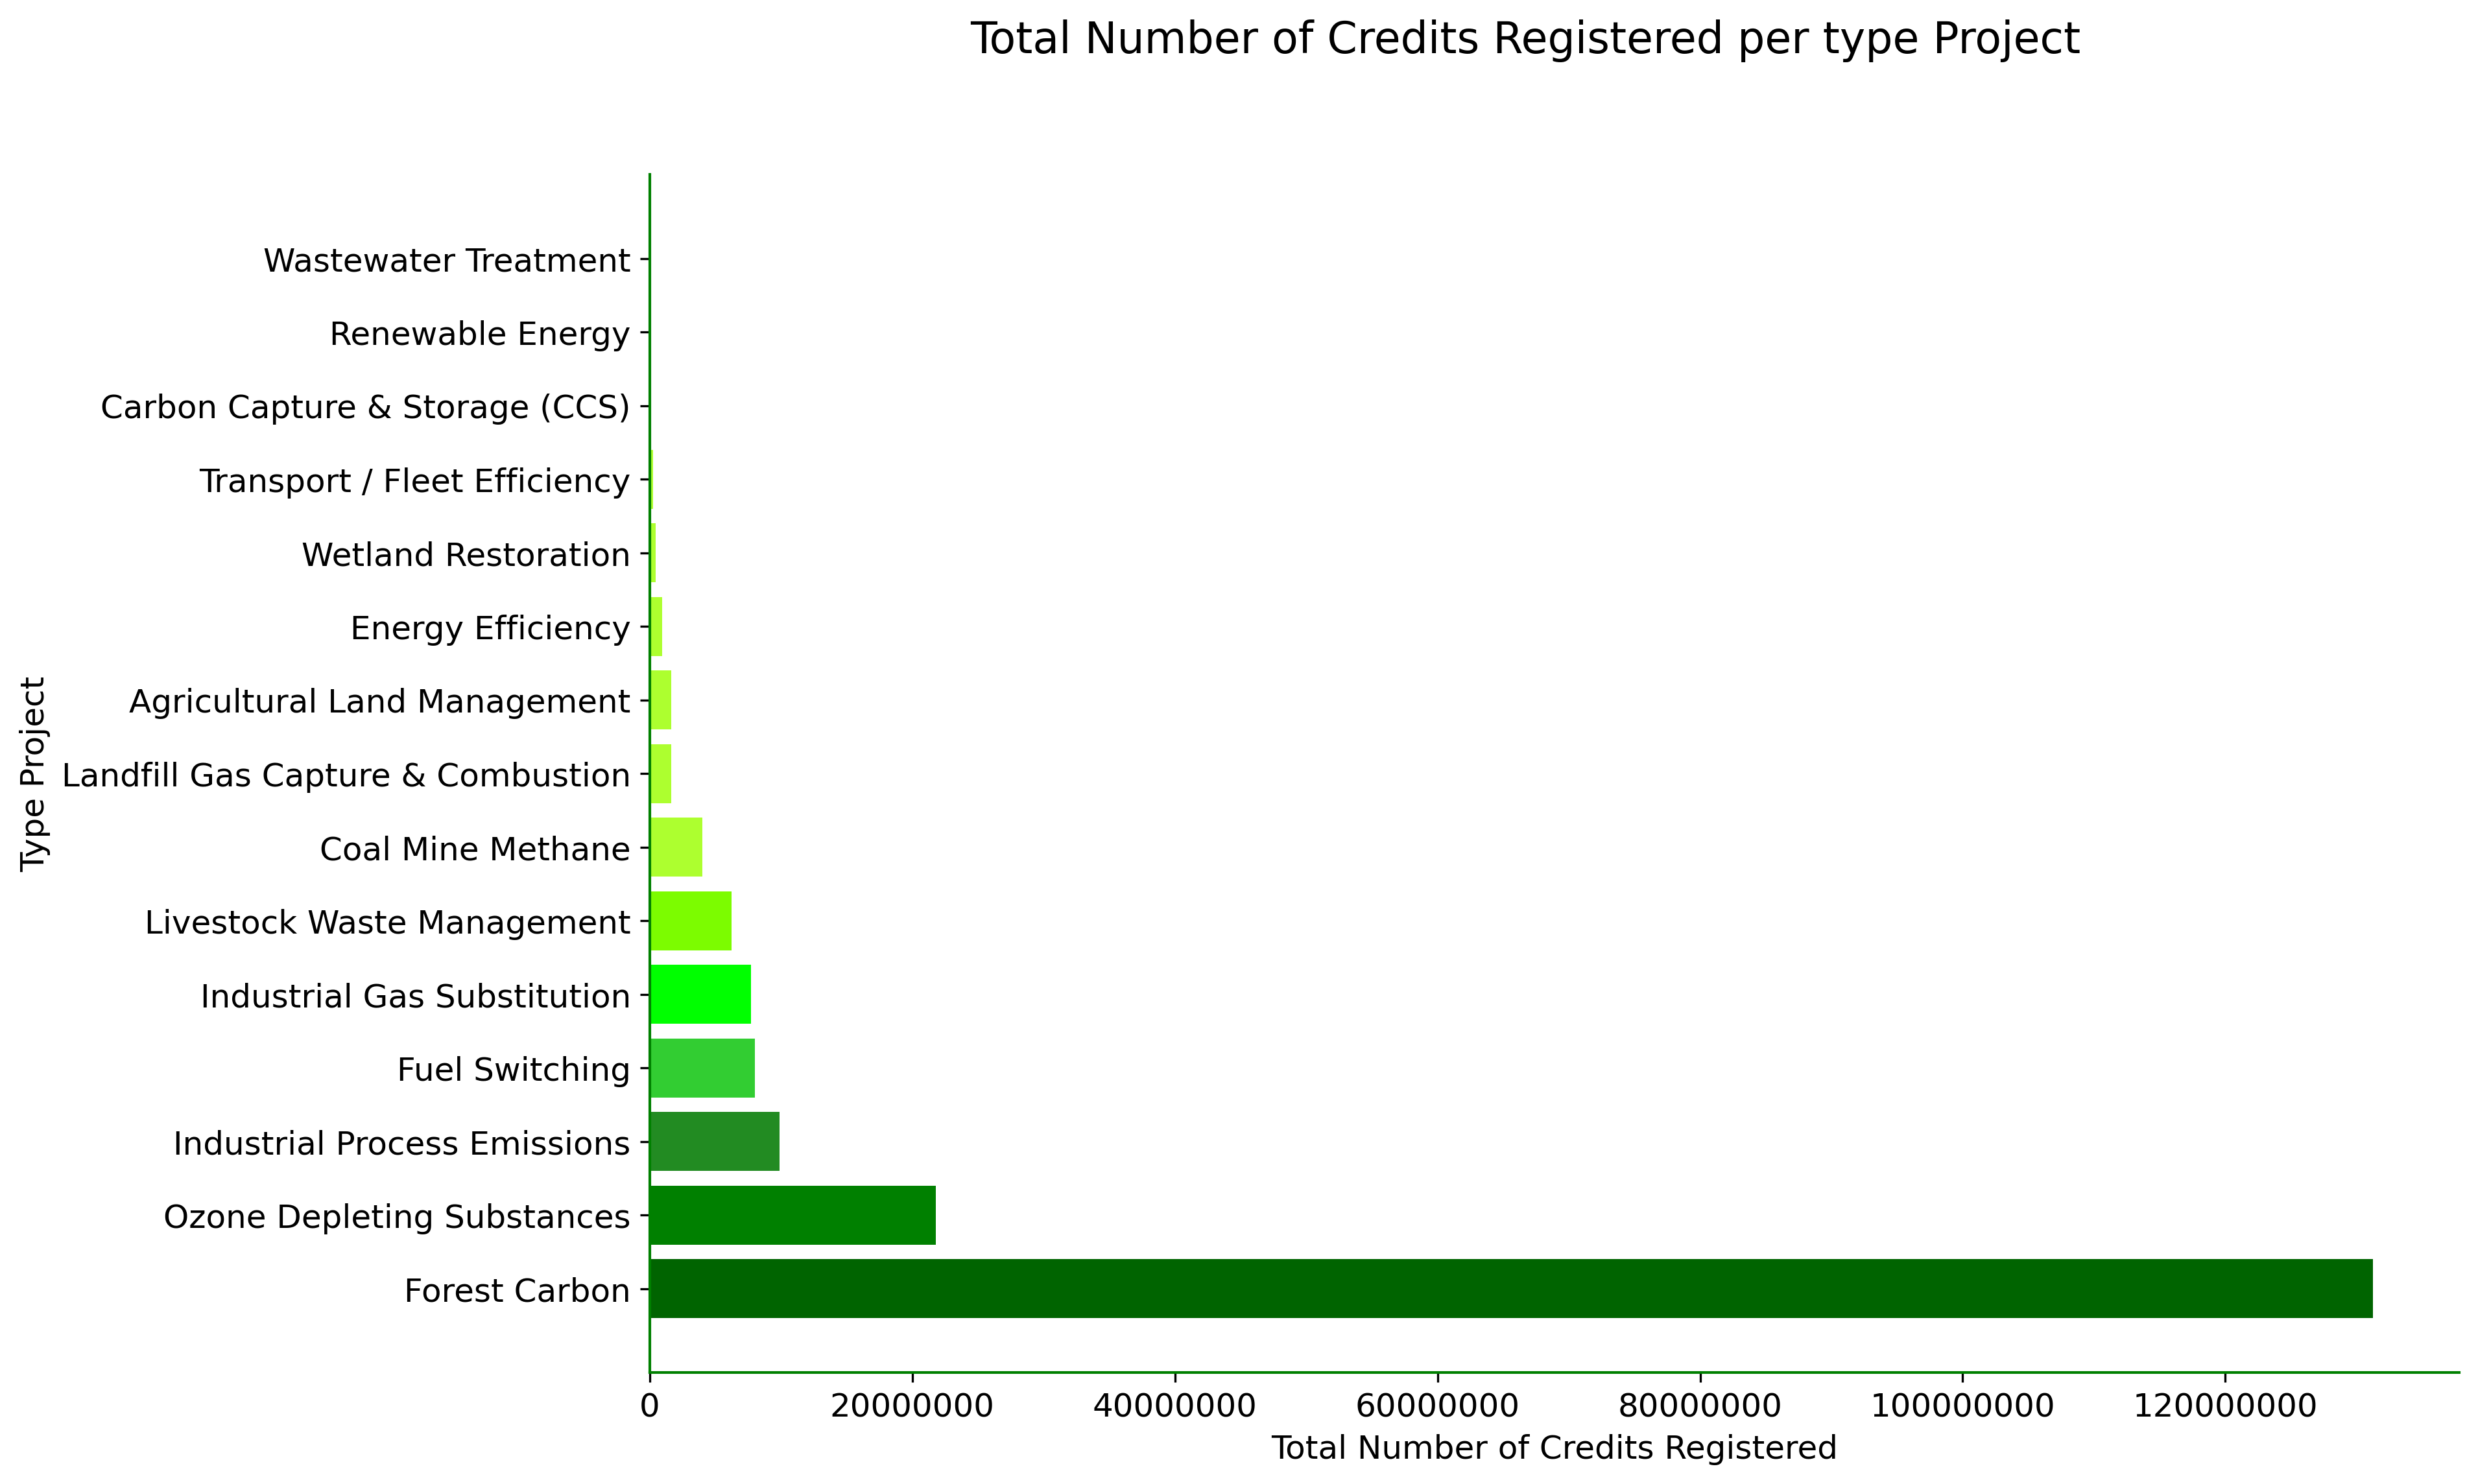

In [66]:
fig, ax = plt.subplots()
fig.suptitle("Total Number of Credits Registered per type Project", fontsize=16)

ax.set_ylabel("Type Project")
ax.set_xlabel("Total Number of Credits Registered")

#ax.set_xticklabels(index_goals,rotation=90)
ax.ticklabel_format(style='plain', axis='x')
ax.grid(visible=False)

color_list = ['darkgreen','green','forestgreen','limegreen','lime','lawngreen','greenyellow']

for i in range(len(credits_per_type_project_list)):
  if i < len(color_list):
    ax.barh(type_project_list[i],credits_per_type_project_list[i],color=color_list[i])
  else:
    ax.barh(type_project_list[i],credits_per_type_project_list[i],color=color_list[len(color_list)-1])

## 4. Análises

- No gráfico "$CO_2$ Emissions", é apresentada a quantidade de carbono emitido por países ao longo dos anos, revelando uma série temporal. As cores foram cuidadosamente selecionadas para enfatizar a importância das questões ambientais. Destaca-se o notável crescimento das emissões de carbono pela China, tornando-se o país líder nessa categoria, o que demanda uma atenção especial para a necessidade de reduzir essas emissões.

- No gráfico "$CO_2$ Emission per 1 million USD of output" é possível visualizar a quantidade de carbono emitida para cada milhão de dólares gerado, refletindo uma melhora nos processos de produção em termos de sustentabilidade ao longo do tempo. Esse gráfico de linhas, também representando uma série temporal, evidencia essa tendência positiva.

- No gráfico "Top 5 industries emitting $CO_2$ in Brazil during the years", uma série temporal, é possível identificar as empresas que mais emitem gás carbônico no país ao longo do tempo. É notável a predominância da indústria de metais básicos, que se destaca como a maior emissora de carbono praticamente durante todo o período analisado.

- O gráfico "Carbon stocks in forests" apresenta a quantidade de carbono armazenada nas florestas de diferentes países, destacando o Brasil como a nação com a maior reserva de carbono em sua área florestal. Essa constatação abre possibilidades para o Brasil se tornar uma potência no emergente mercado de carbono.

- No gráfico "Percentage of Forest Area", é possível observar a proporção de área florestal em relação ao território dos países. Essa informação pode ser comparada com o gráfico anterior, permitindo compreender a relação entre o tamanho da área florestal de um país e sua influência na produção de carbono.

- O gráfico "Percentage of Carbon Tonnes per Area" revela a relação entre a quantidade de carbono nas florestas e a área territorial do país. Essa série temporal nos permite inferir novamente a posição de destaque do Brasil nesse mercado em crescimento. Nota-se uma distância significativa entre o percentual do Brasil e grandes potências industriais, como os Estados Unidos e a China, sugerindo que o país latino pode se tornar um fornecedor de carbono para essas nações mais industrializadas.

- No gráfico "Number of projects by country", é apresentado o número de projetos de compensação de carbono por país, podendo ser visualizado com éficiencia por meio de gráfico de barras. As cores foram escolhidas com a intenção de dar énfase a diparidades dos valores. Ao analisar o gráfico, podemos notar a os Estados Unidos dominante quanto ao número de projeto de compensação de carbono.

- No gráfico "Number of projects per Goal", é apresentado o número de projetos de compensação de carbono por Objetivo. Onde, ao fazer análisar, é notável que as principais motivações dos projetos são as ações climáticas e industriais, invação e infraestrutura.